In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_with_model_clean.csv')


In [6]:
# Seleccionar solo las columnas numéricas de interés
columnas_numericas = ['odometer', 'year', 'price']
df_numericas = df[columnas_numericas]

# Calcular la media de cada columna y redondear a 2 decimales
media = df_numericas.mean().round(2)

# Calcular la desviación estándar de cada columna y redondear a 2 decimales
desviacion_estandar = df_numericas.std().round(2)

# Calcular la moda de cada columna
moda = df_numericas.mode().iloc[0]  # Usamos iloc[0] para obtener la primera moda en caso de que haya varias

# Calcular otras medidas estadísticas según sea necesario, como mediana, mínimo, máximo, etc.
mediana = df_numericas.median().round(2)
minimo = df_numericas.min()
maximo = df_numericas.max()

# Redondear mínimo y máximo a 2 decimales
minimo = minimo.round(2)
maximo = maximo.round(2)

# Crear un DataFrame para mostrar las medidas estadísticas
estadisticas = pd.DataFrame({
    'Media': media,
    'Desviación Estándar': desviacion_estandar,
    'Moda': moda,
    'Mediana': mediana,
    'Mínimo': minimo,
    'Máximo': maximo
})

# Mostrar el DataFrame con las medidas estadísticas
print(estadisticas)



              Media  Desviación Estándar      Moda   Mediana  Mínimo    Máximo
odometer  103344.18             57072.06  200000.0  102401.5     0.0  250000.0
year        2011.74                 5.21    2013.0    2013.0  1997.0    2022.0
price      16044.20             11367.65    6995.0   12995.0  1000.0   52000.0


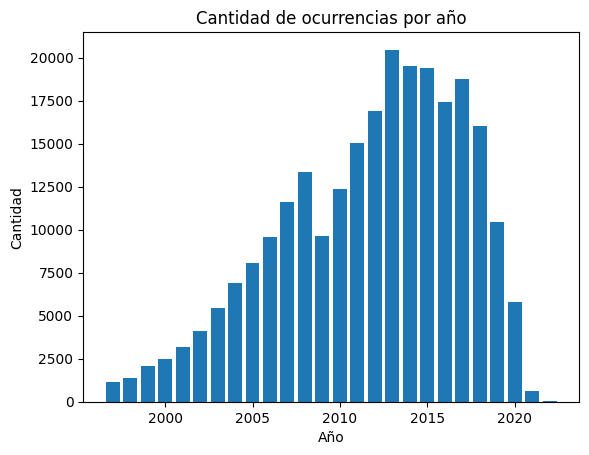

In [7]:
year_counts = df['year'].value_counts()

year_counts = year_counts.sort_index()

plt.bar(year_counts.index, year_counts.values)

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de ocurrencias por año')

# Mostrar el gráfico
plt.show()


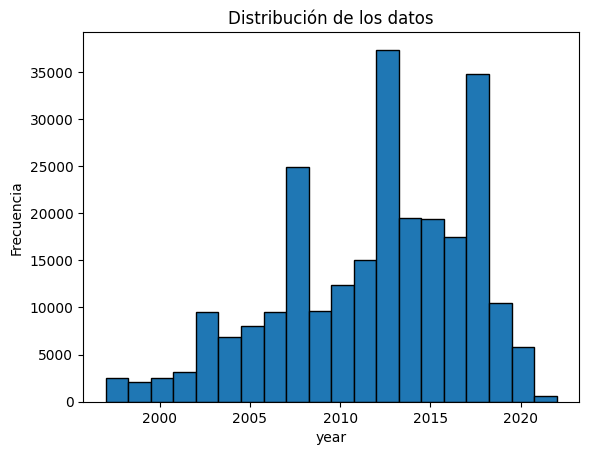

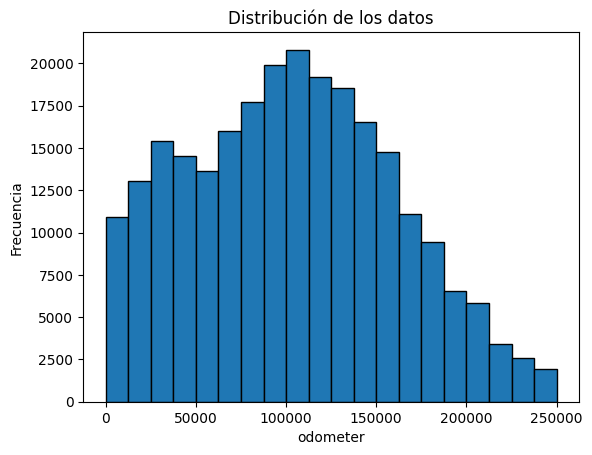

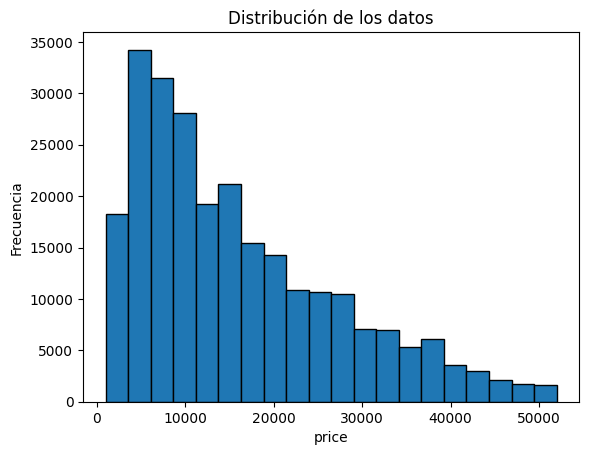

In [8]:
datos_num = ('year', 'odometer', 'price')

for n in datos_num:
    # Crear el histograma
    plt.hist(df[n], bins=20, edgecolor='black') # Puedes ajustar el número de bins según tus preferencias

    # Añadir etiquetas y título
    plt.xlabel(n)
    plt.ylabel('Frecuencia')
    plt.title('Distribución de los datos')

    # Mostrar el histograma
    plt.show()


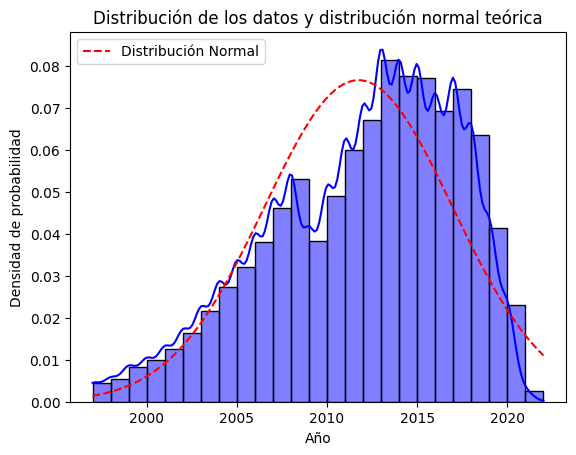

In [9]:
# Datos de la columna "year"
data = df['year']

# Calcular la media y la desviación estándar de los datos
mu, sigma = np.mean(data), np.std(data)

# Crear un rango de valores para el eje x
x = np.linspace(min(data), max(data), 100)

# Calcular la densidad de probabilidad de una distribución normal con los mismos parámetros
pdf = norm.pdf(x, mu, sigma)

# Crear el gráfico de densidad
sns.histplot(data, kde=True, stat='density', color='blue',linewidth=1,binwidth=1)  # Histograma con la densidad estimada
plt.plot(x, pdf, color='red', linestyle='--', label='Distribución Normal')  # Distribución normal teórica
plt.xlabel('Año')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de los datos y distribución normal teórica')
plt.legend()
plt.show()


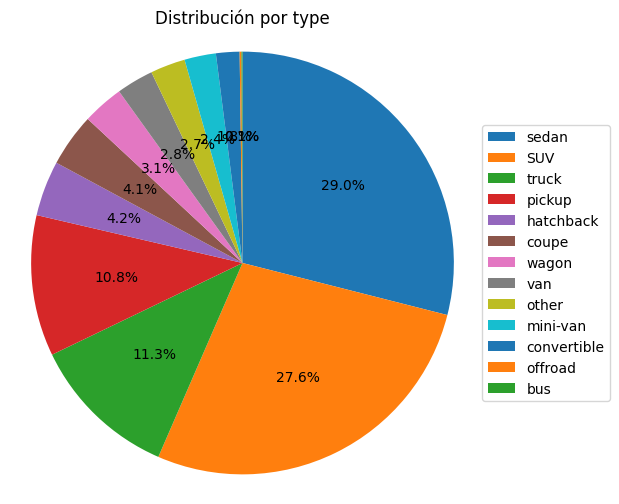

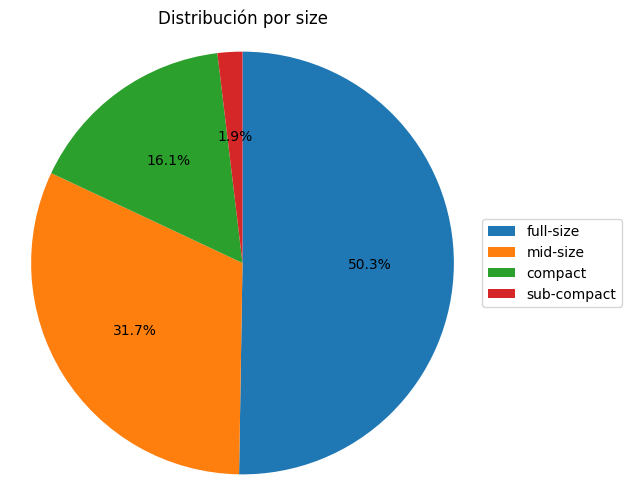

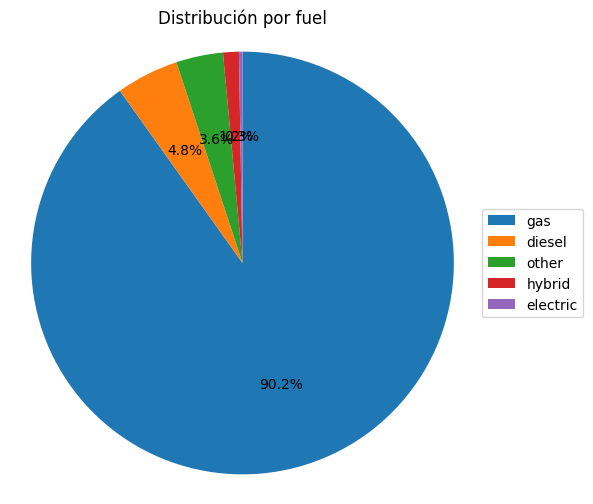

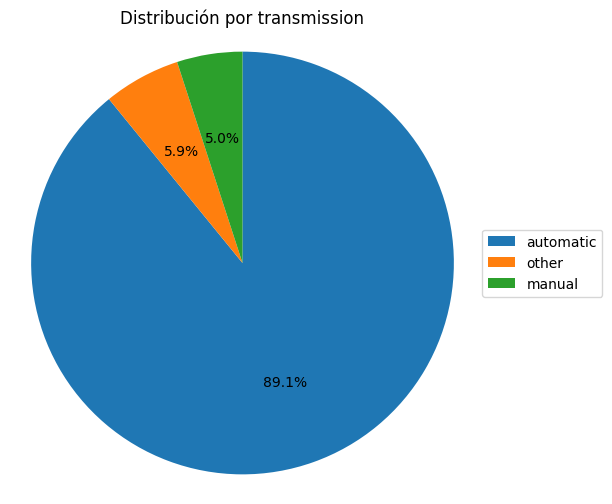

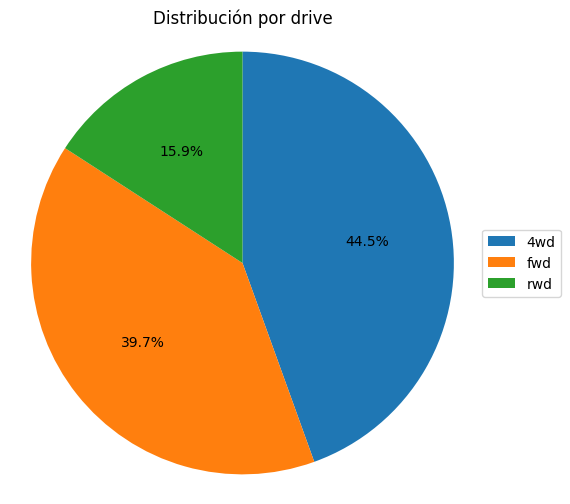

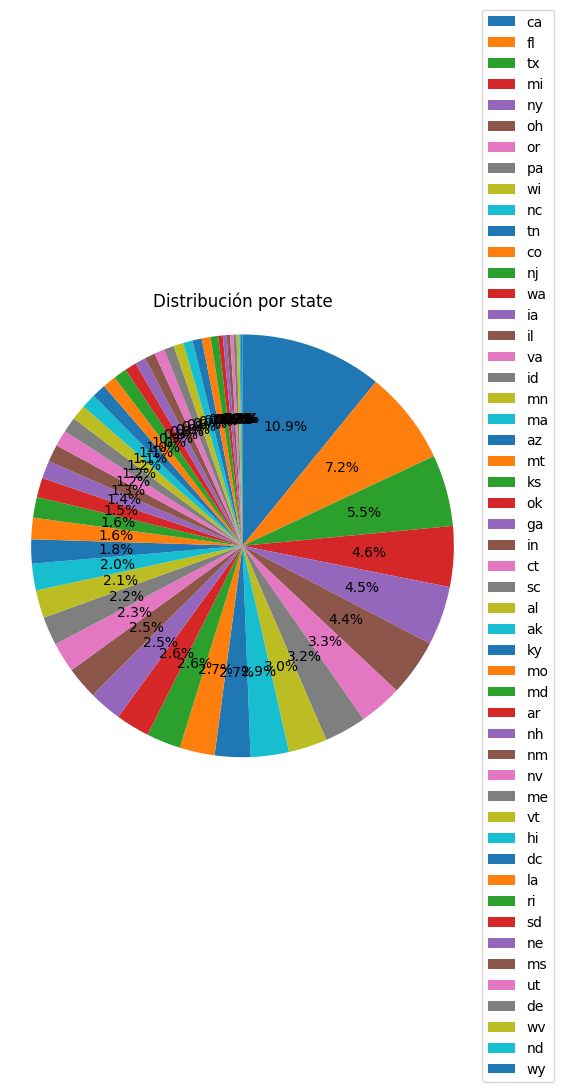

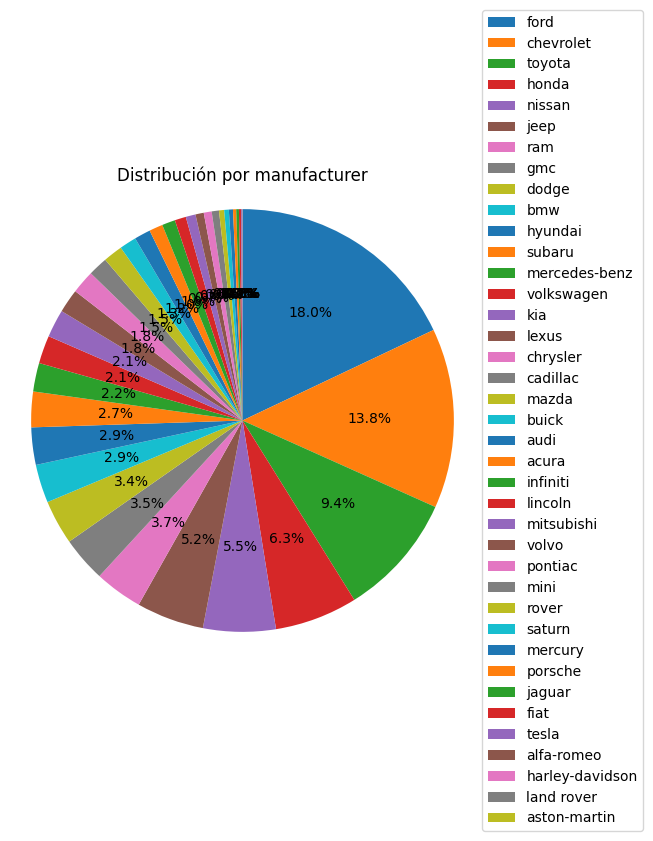

In [10]:
datos = ('type', 'size', 'fuel', 'transmission', 'drive', 'state', 'manufacturer')

for d in datos:
    # Contar las ocurrencias de cada categoría en la columna correspondiente
    type_counts = df[d].value_counts()

    # Crear el gráfico de torta
    plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico según sea necesario
    plt.pie(type_counts, labels=None, autopct='%1.1f%%', startangle=90, counterclock=False)  # La primera categoría comienza a las 12 en punto y el resto sigue el orden de las agujas del reloj
    plt.axis('equal')  # Hace que el gráfico sea circular
    plt.title(f'Distribución por {d}')
    plt.legend(type_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))  # Coloca la leyenda fuera del gráfico
    plt.show()


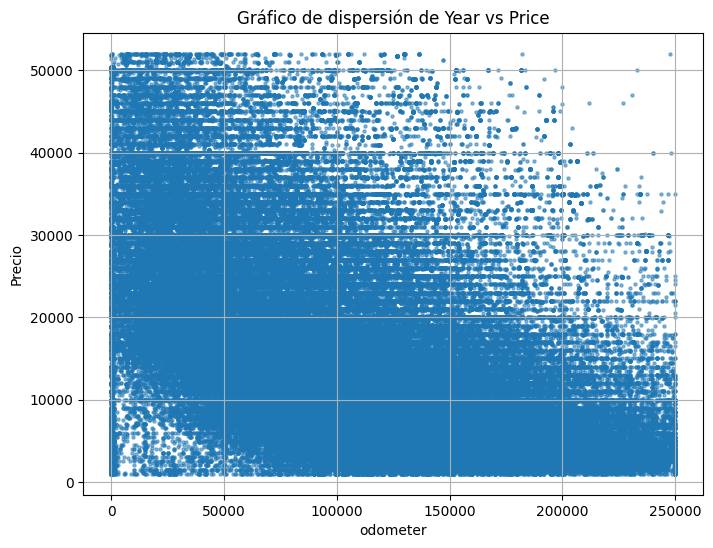

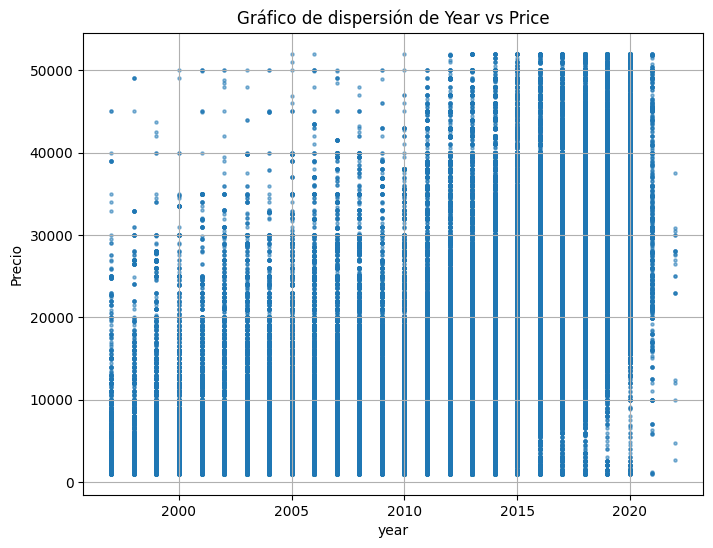

In [11]:
for n in ('odometer', 'year'):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[n], df['price'], alpha=0.5, s=5)  # alpha ajusta la transparencia de los puntos
    plt.title('Gráfico de dispersión de Year vs Price')
    plt.xlabel(n)
    plt.ylabel('Precio')
    plt.grid(True)  # Agrega cuadrícula al gráfico
    plt.show()


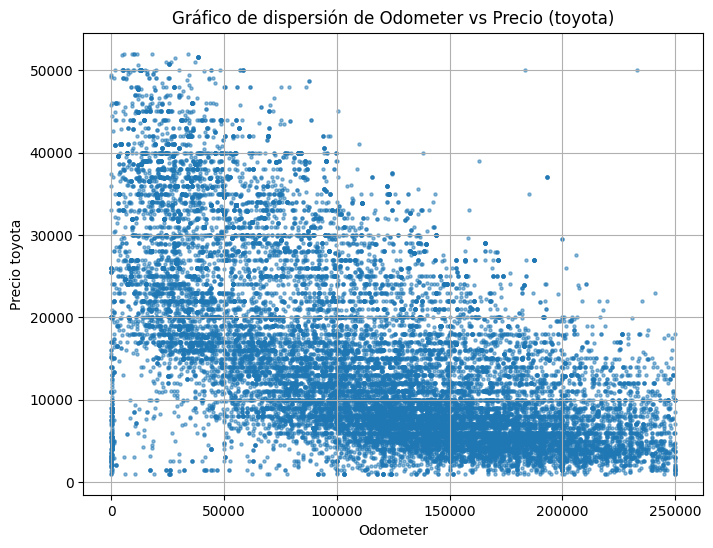

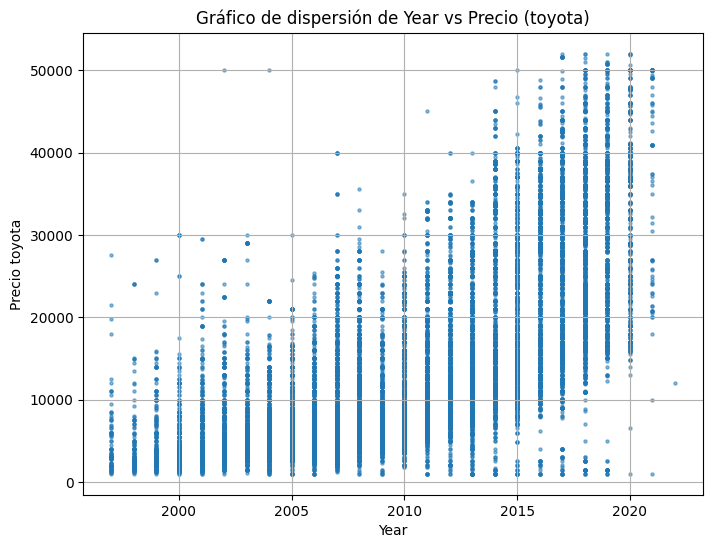

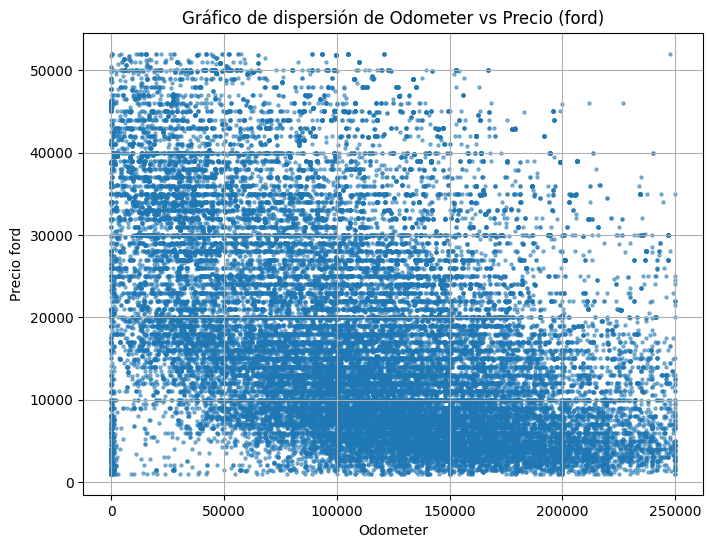

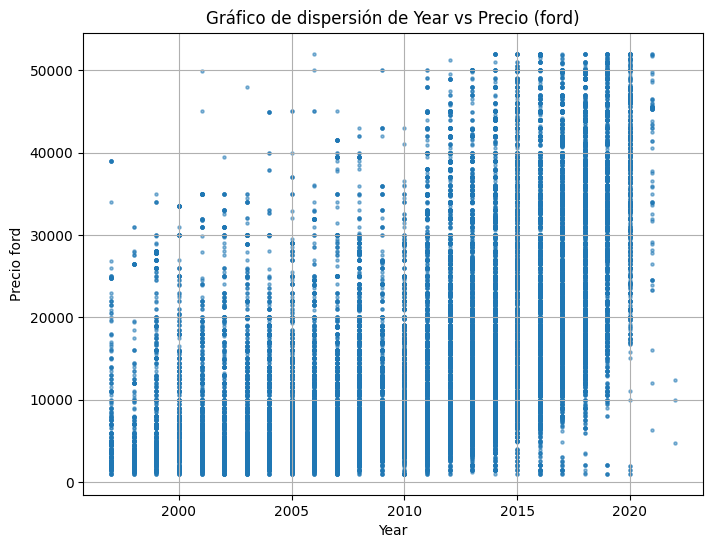

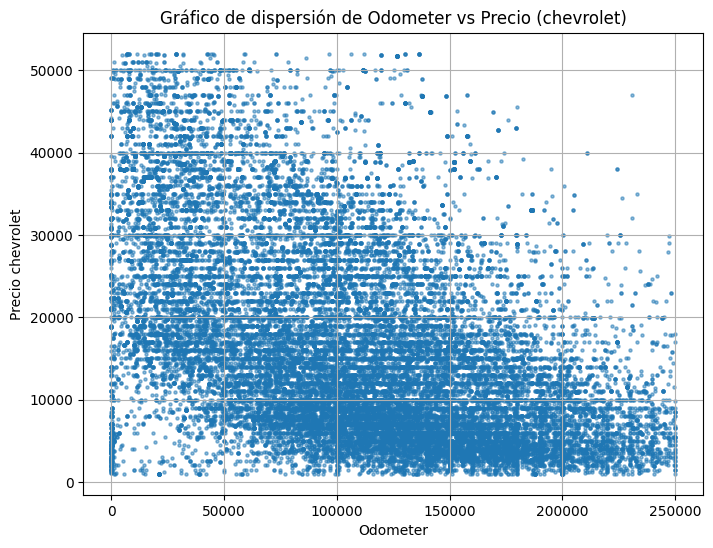

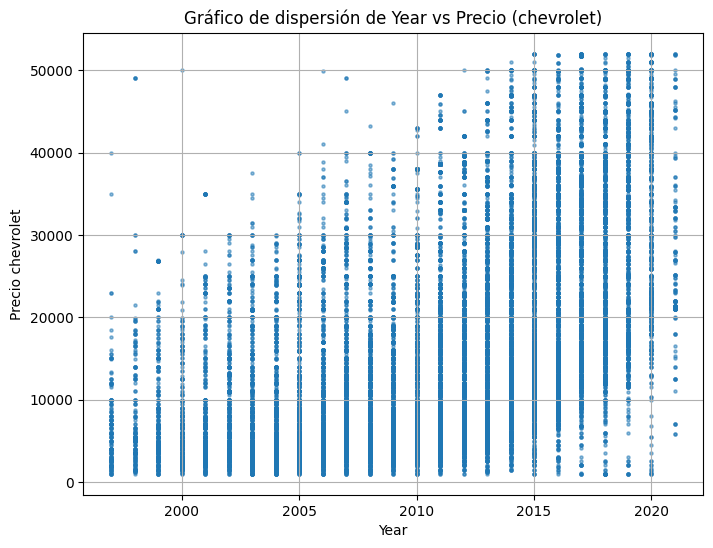

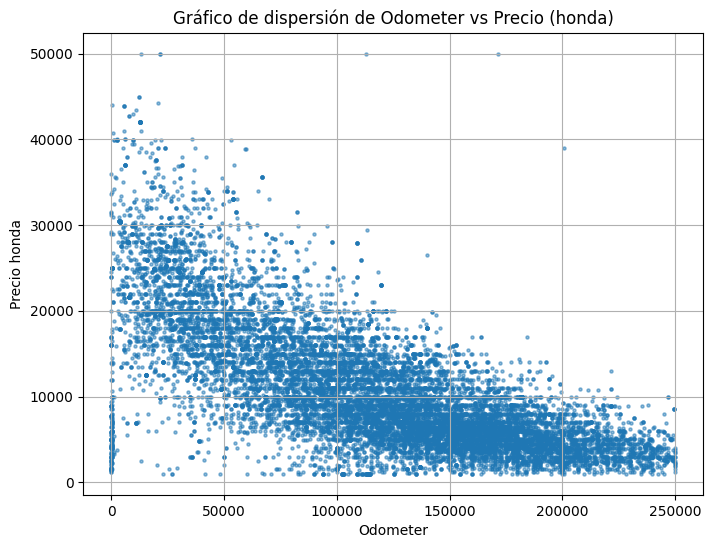

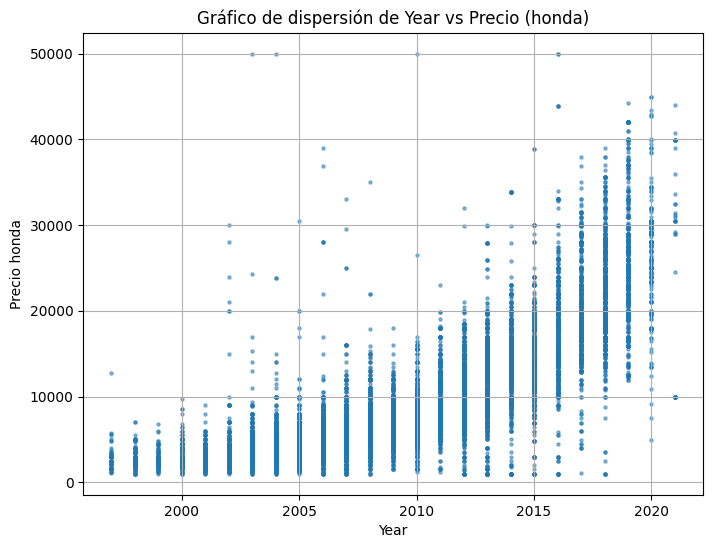

In [12]:
marcas = ['toyota', 'ford', 'chevrolet', 'honda']

for m in marcas:
    df_marca = df[df['manufacturer'] == m]
    for n in ('odometer', 'year'):
        plt.figure(figsize=(8, 6))
        plt.scatter(df_marca[n], df_marca['price'], alpha=0.5, s=5)  
        plt.title(f'Gráfico de dispersión de {n.capitalize()} vs Precio ({m})')
        plt.xlabel(n.capitalize())
        plt.ylabel('Precio ' + m)
        plt.grid(True)  # Agrega cuadrícula al gráfico
        plt.show()




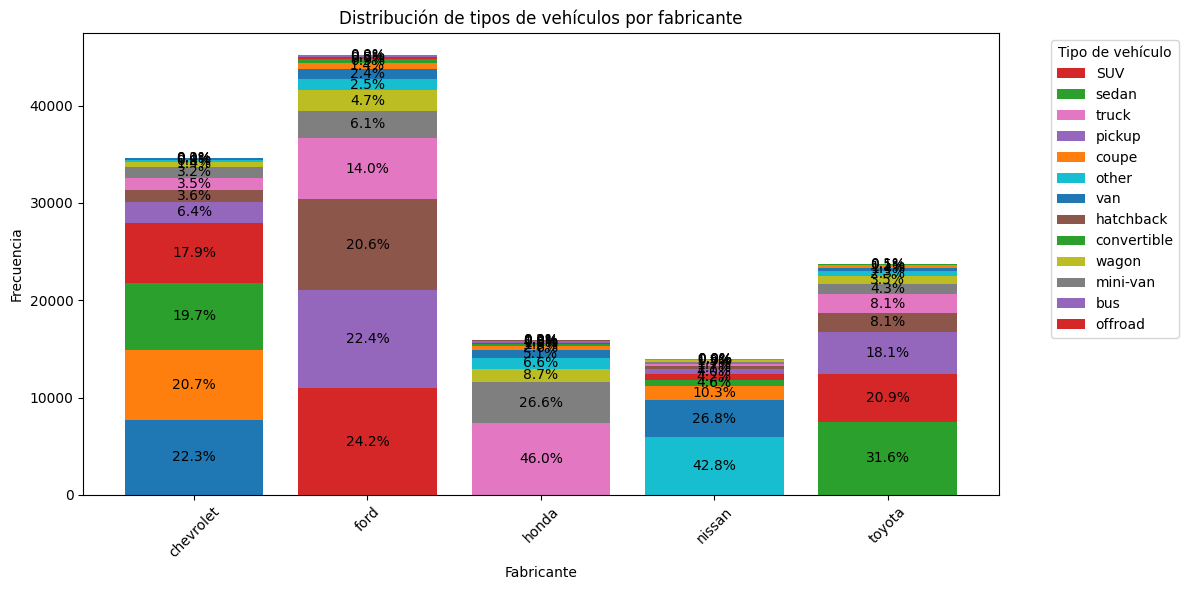

In [13]:
# Filtramos el dataframe para incluir solo los fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Calculamos las frecuencias y porcentajes por fabricante y tipo
df_freq = df_filtered.groupby(['manufacturer', 'type']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los tipos de vehículos por porcentaje para cada fabricante
sorted_types = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Dibujamos las barras apiladas
for manufacturer in df_freq.index:
    bottom = 0
    for type in sorted_types[manufacturer]:
        height = df_freq.loc[manufacturer, type]
        percentage = df_percentages.loc[manufacturer, type]
        ax.bar(manufacturer, height, bottom=bottom, label=type, width=0.8)
        
        if height > 0:
            ax.text(manufacturer, bottom + height/2, f'{percentage:.1f}%', 
                    ha='center', va='center')
        
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Fabricante')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de tipos de vehículos por fabricante')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Tipo de vehículo', 
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()


C:\Users\sergi\AppData\Local\Temp\ipykernel_10256\314249328.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


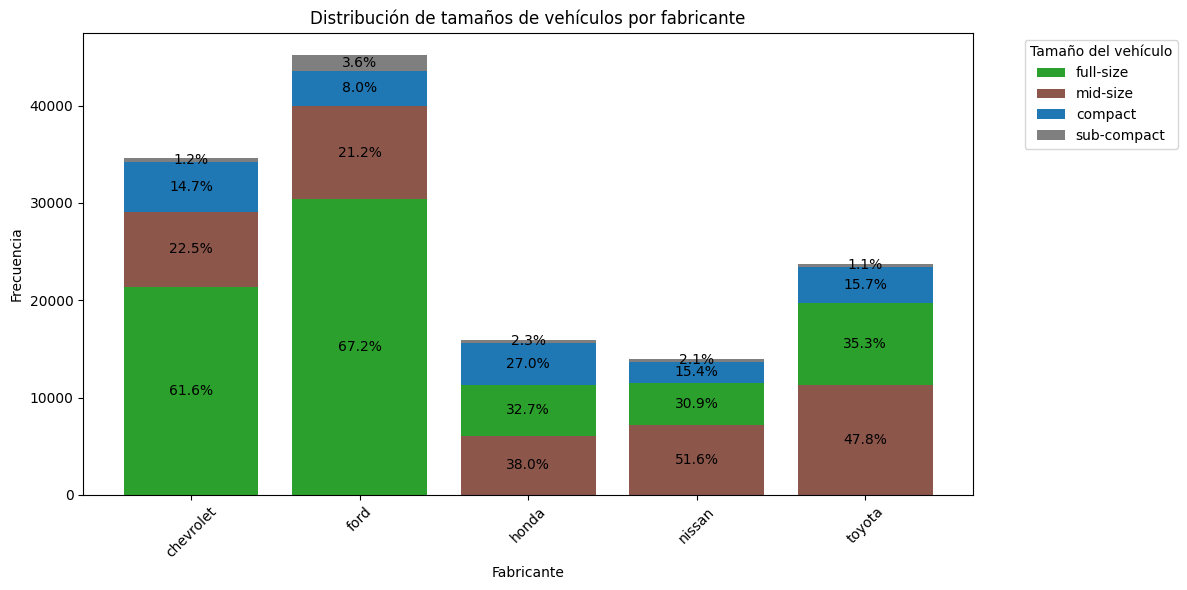

In [14]:
# Filtramos el dataframe para incluir solo los fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Calculamos las frecuencias y porcentajes por fabricante y tamaño
df_freq = df_filtered.groupby(['manufacturer', 'size']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los tamaños de vehículos por porcentaje para cada fabricante
sorted_sizes = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos una paleta de colores única para cada tamaño
unique_sizes = df_freq.columns.unique()
color_map = plt.cm.get_cmap('tab10')
color_dict = {size: color_map(i/len(unique_sizes)) for i, size in enumerate(unique_sizes)}

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Dibujamos las barras apiladas
for manufacturer in df_freq.index:
    bottom = 0
    for size in sorted_sizes[manufacturer]:
        height = df_freq.loc[manufacturer, size]
        percentage = df_percentages.loc[manufacturer, size]
        ax.bar(manufacturer, height, bottom=bottom, label=size, width=0.8, color=color_dict[size])
        
        if height > 0:
            ax.text(manufacturer, bottom + height/2, f'{percentage:.1f}%', 
                    ha='center', va='center')
        
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Fabricante')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de tamaños de vehículos por fabricante')

# Creamos una leyenda única
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Tamaño del vehículo', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_10256\3473612563.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


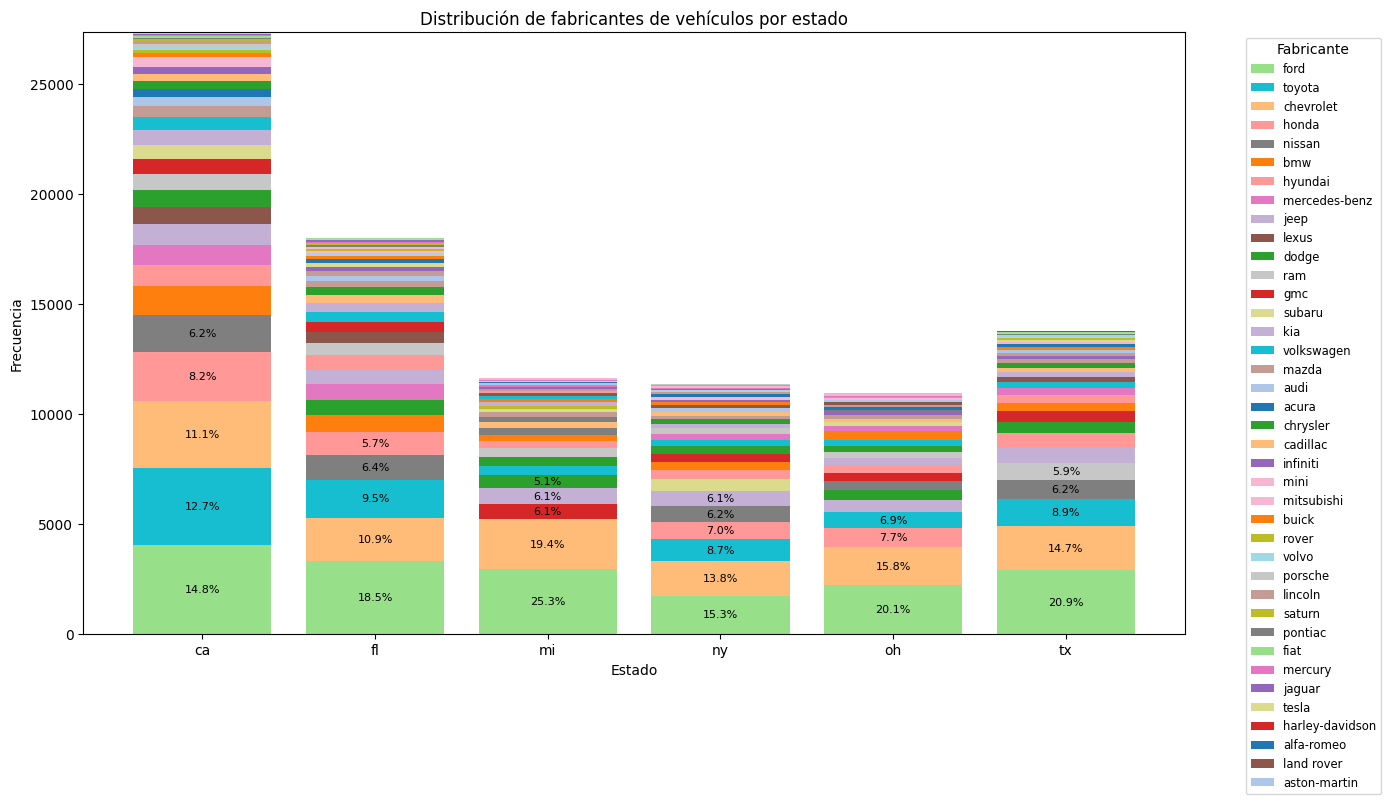

In [15]:
# Lista de estados especificados
states = ['ca', 'fl', 'tx', 'mi', 'ny','oh']

# Filtramos el dataframe para incluir solo los estados especificados
df_filtered = df[df['state'].isin(states)]

# Calculamos las frecuencias y porcentajes por estado y fabricante
df_freq = df_filtered.groupby(['state', 'manufacturer']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los fabricantes por porcentaje para cada estado
sorted_manufacturers = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos una paleta de colores única para cada fabricante
unique_manufacturers = df_freq.columns.unique()
color_map = plt.cm.get_cmap('tab20')
color_dict = {manufacturer: color_map(i/len(unique_manufacturers)) for i, manufacturer in enumerate(unique_manufacturers)}

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujamos las barras apiladas
for state in df_freq.index:
    bottom = 0
    for manufacturer in sorted_manufacturers[state]:
        height = df_freq.loc[state, manufacturer]
        percentage = df_percentages.loc[state, manufacturer]
        ax.bar(state, height, bottom=bottom, label=manufacturer, width=0.8, color=color_dict[manufacturer])
        
        if height > 0 and percentage >= 5:  # Solo mostramos etiquetas para porcentajes >= 5%
            ax.text(state, bottom + height/2, f'{percentage:.1f}%', 
                    ha='center', va='center', fontsize=8)
        
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Estado')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de fabricantes de vehículos por estado')

# Creamos una leyenda única
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Fabricante', 
          bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.xticks(rotation=0)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_10256\55413698.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


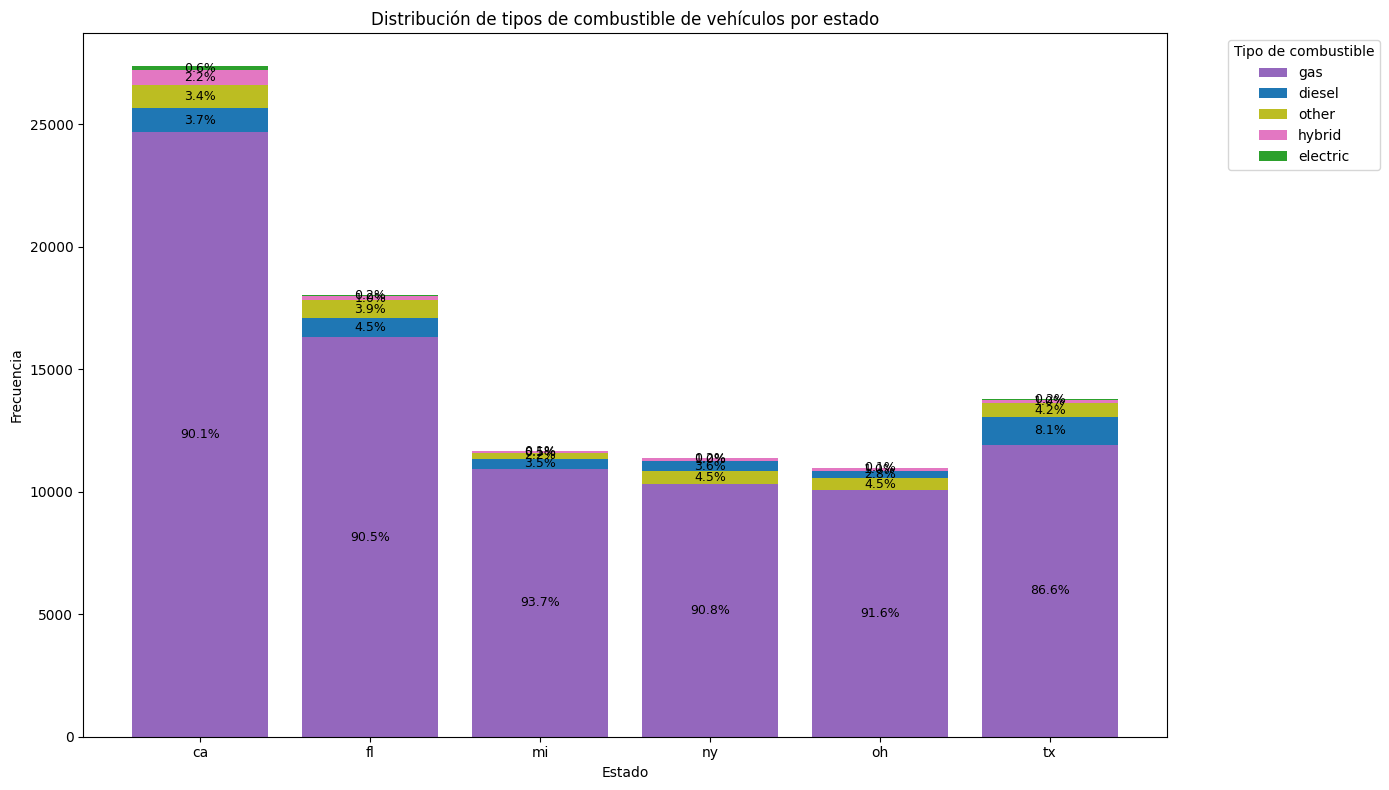

In [16]:
# Lista de estados especificados
states = ['ca', 'fl', 'tx', 'mi', 'ny','oh']

# Filtramos el dataframe para incluir solo los estados especificados
df_filtered = df[df['state'].isin(states)]

# Calculamos las frecuencias y porcentajes por estado y tipo de combustible
df_freq = df_filtered.groupby(['state', 'fuel']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los tipos de combustible por porcentaje para cada estado
sorted_fuels = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos una paleta de colores única para cada tipo de combustible
unique_fuels = df_freq.columns.unique()
color_map = plt.cm.get_cmap('tab10')
color_dict = {fuel: color_map(i/len(unique_fuels)) for i, fuel in enumerate(unique_fuels)}

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujamos las barras apiladas
for state in df_freq.index:
    bottom = 0
    for fuel in sorted_fuels[state]:
        height = df_freq.loc[state, fuel]
        percentage = df_percentages.loc[state, fuel]
        ax.bar(state, height, bottom=bottom, label=fuel, width=0.8, color=color_dict[fuel])
        
        if height > 0:  # Mostramos todas las etiquetas de porcentaje
            ax.text(state, bottom + height/2, f'{percentage:.1f}%', 
                    ha='center', va='center', fontsize=9)
        
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Estado')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de tipos de combustible de vehículos por estado')

# Creamos una leyenda única
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Tipo de combustible', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

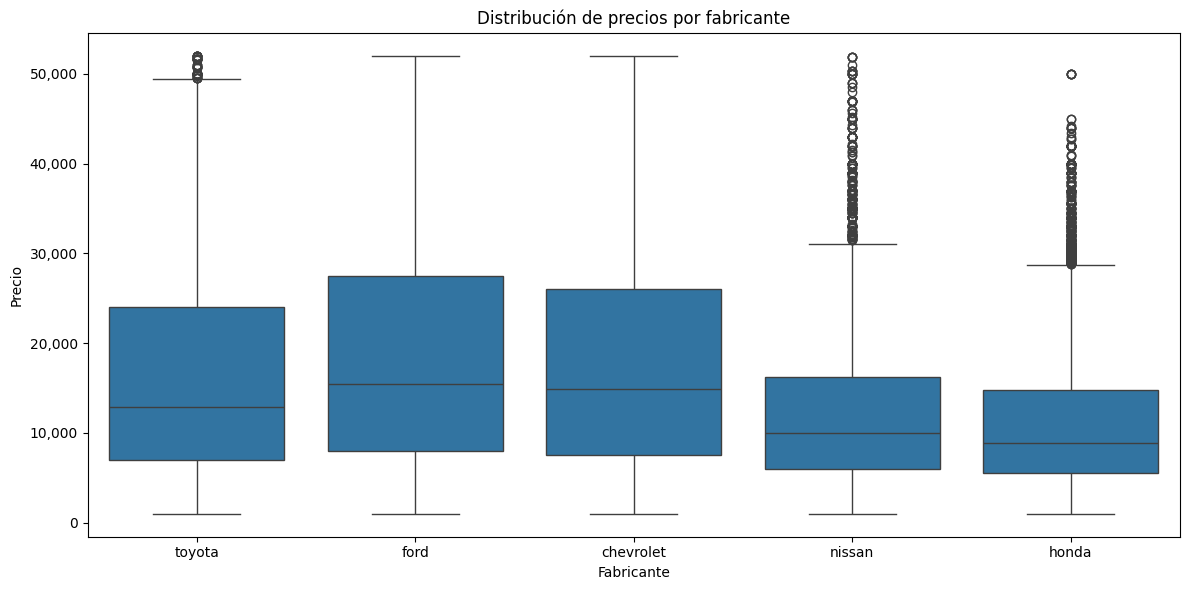

In [17]:
# Lista de fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']

# Filtramos el dataframe para incluir solo los fabricantes especificados
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=df_filtered, order=manufacturers)

# Configuramos el gráfico
plt.title('Distribución de precios por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Precio')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0)

# Ajustamos el formato de los valores del eje y para mostrar miles con coma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

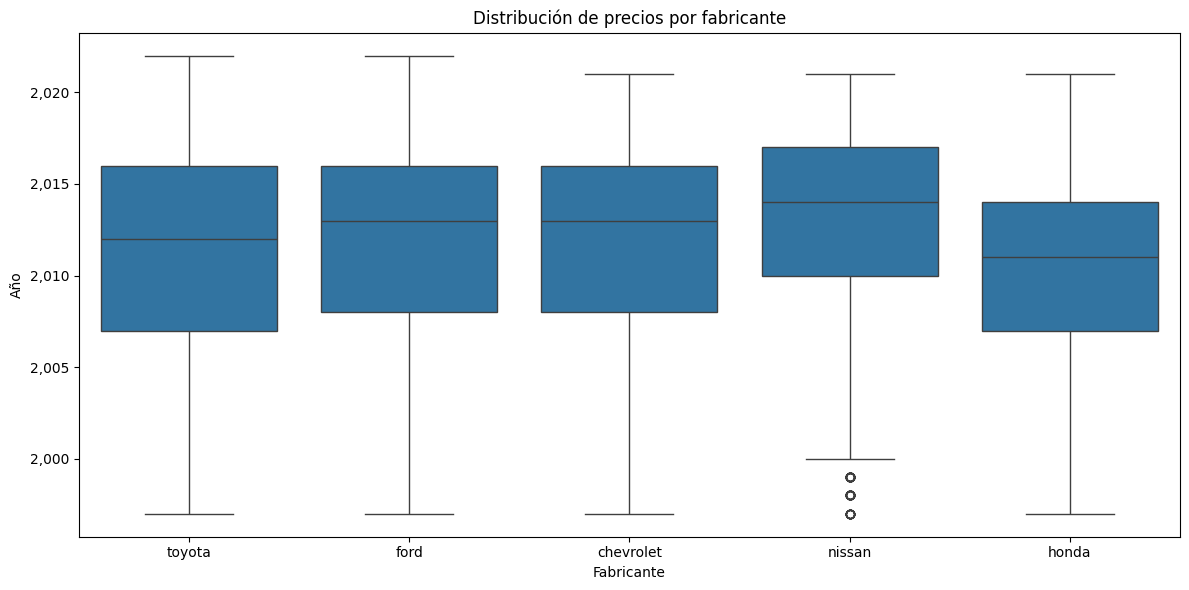

In [18]:
# Lista de fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']

# Filtramos el dataframe para incluir solo los fabricantes especificados
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='year', data=df_filtered, order=manufacturers)

# Configuramos el gráfico
plt.title('Distribución de precios por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Año')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0)

# Ajustamos el formato de los valores del eje y para mostrar miles con coma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

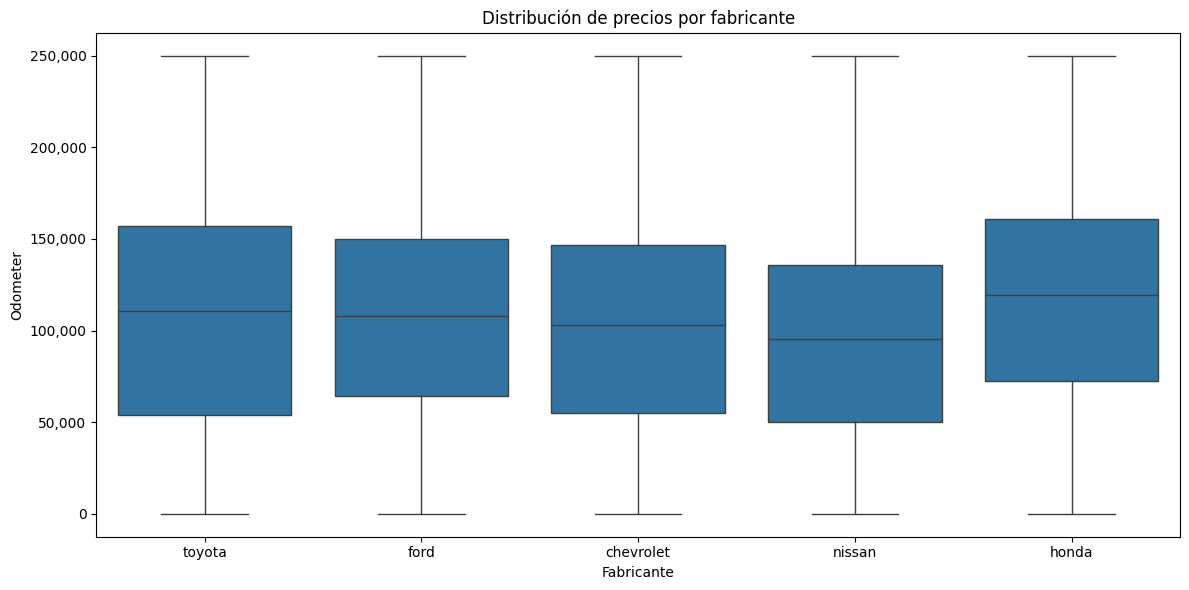

In [19]:
# Lista de fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']

# Filtramos el dataframe para incluir solo los fabricantes especificados
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='odometer', data=df_filtered, order=manufacturers)

# Configuramos el gráfico
plt.title('Distribución de precios por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Odometer')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0)

# Ajustamos el formato de los valores del eje y para mostrar miles con coma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_10256\2107909662.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([state.upper() for state in states])


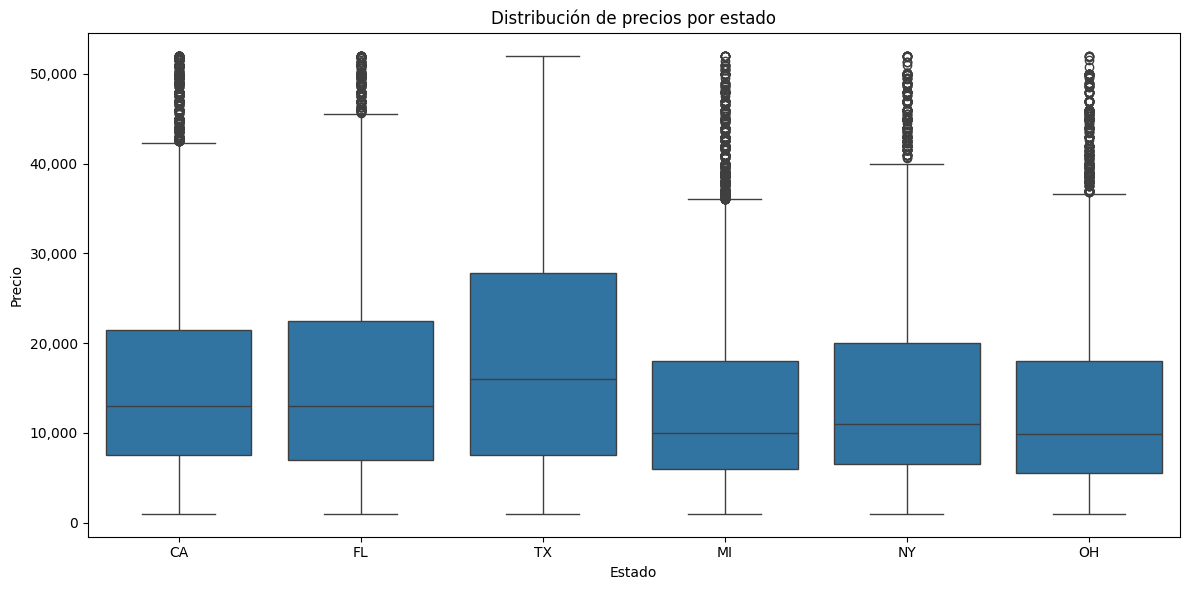

In [20]:
# Lista de estados especificados
states = ['ca', 'fl', 'tx', 'mi', 'ny','oh']

# Filtramos el dataframe para incluir solo los estados especificados
df_filtered = df[df['state'].isin(states)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='price', data=df_filtered, order=states)

# Configuramos el gráfico
plt.title('Distribución de precios por estado')
plt.xlabel('Estado')
plt.ylabel('Precio')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0)

# Ajustamos el formato de los valores del eje y para mostrar miles con coma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Convertimos las etiquetas de estado a mayúsculas
plt.gca().set_xticklabels([state.upper() for state in states])

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

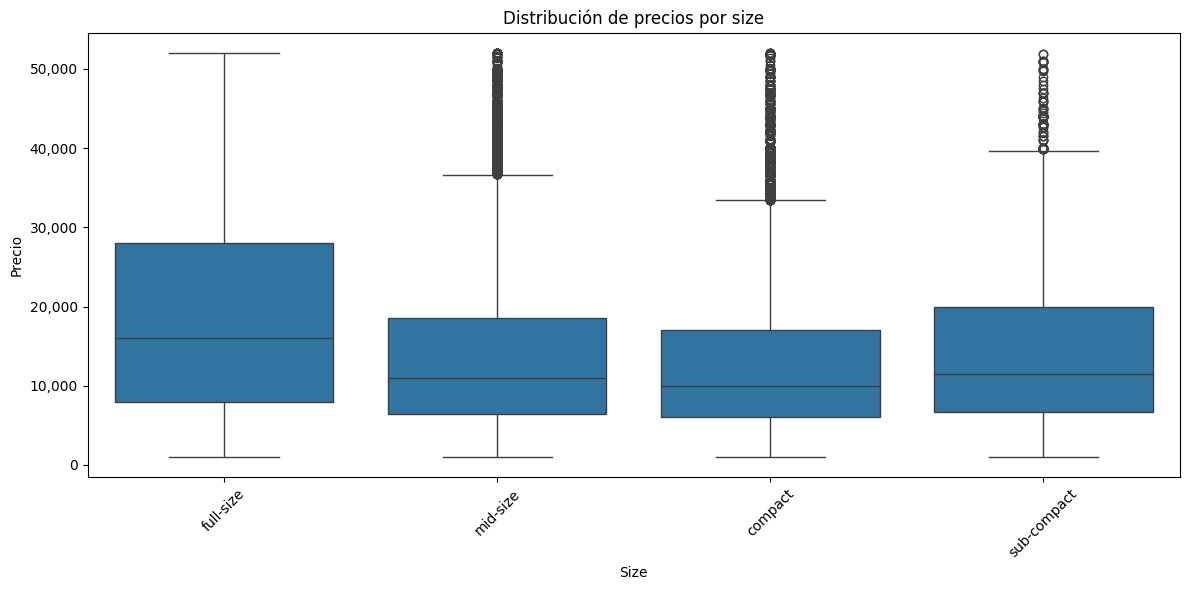

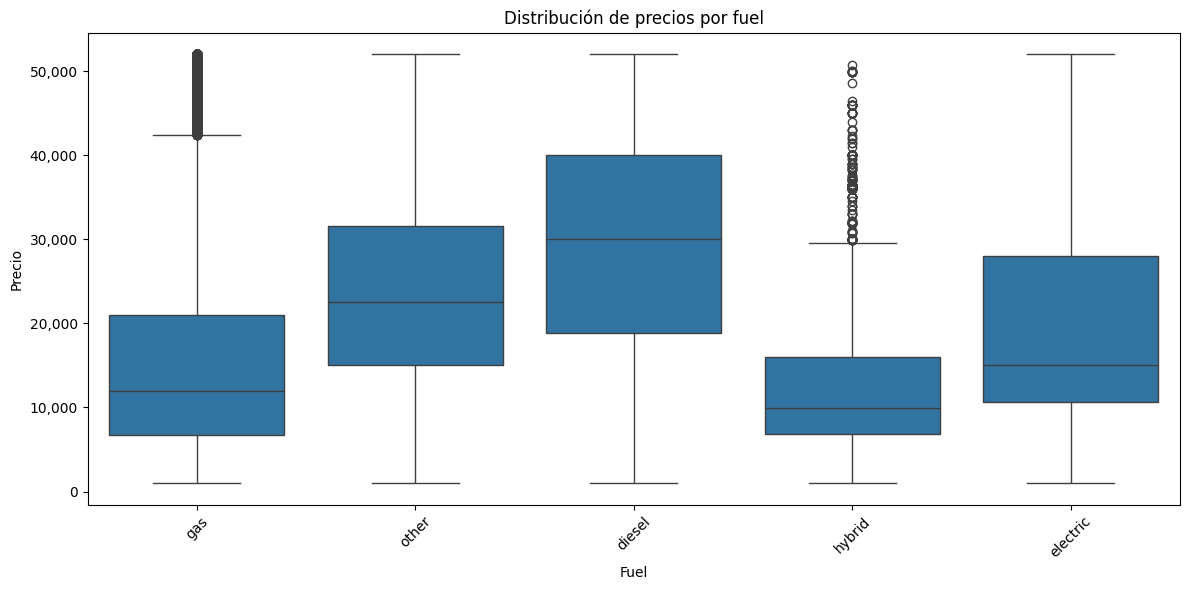

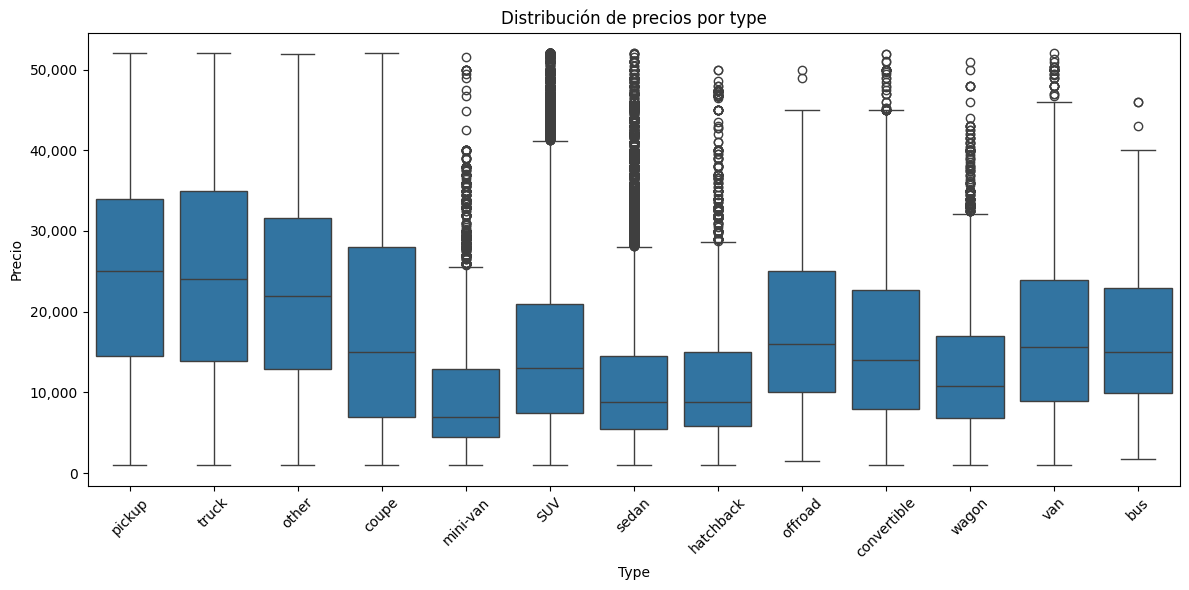

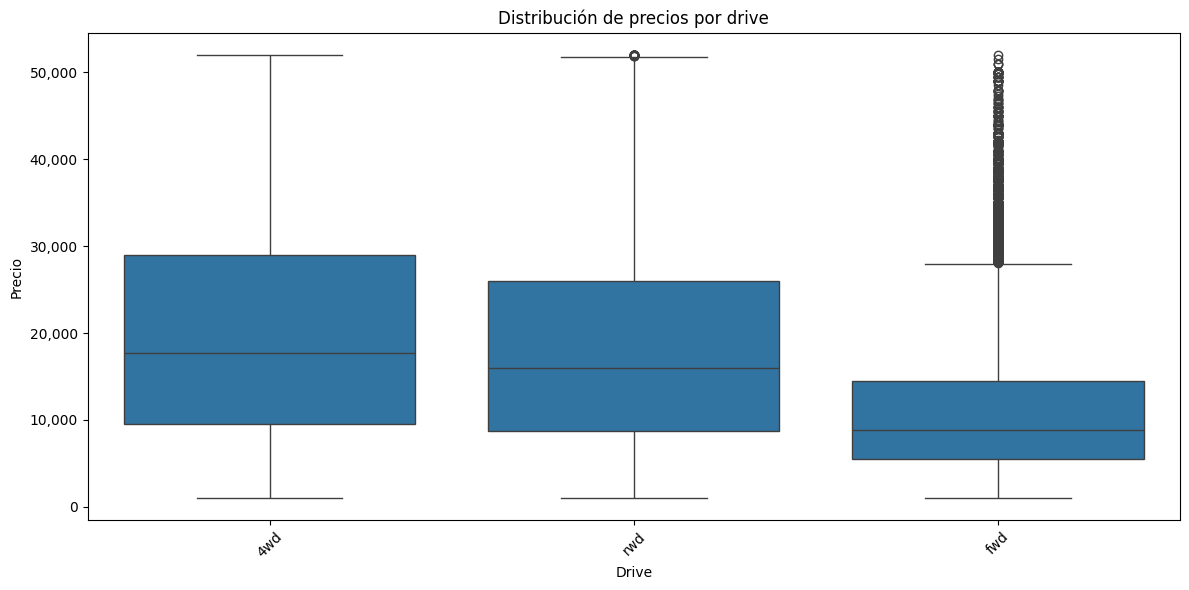

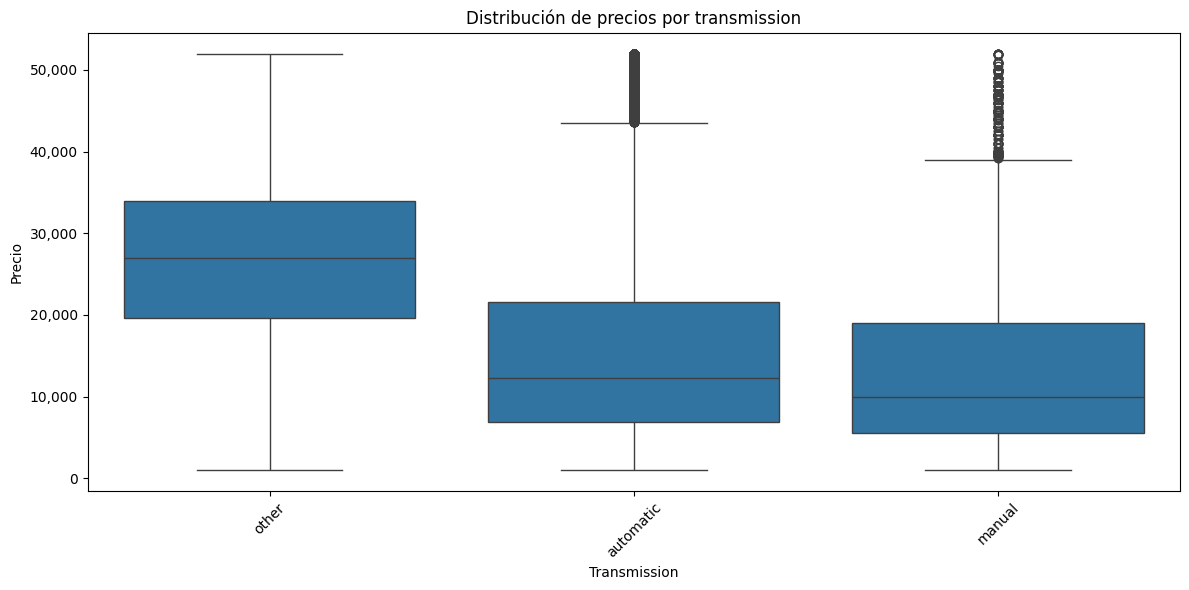

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ('size', 'fuel', 'type', 'drive', 'transmission')

for v in variables:
    # Creamos el gráfico
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=v, y='price', data=df)

    # Configuramos el gráfico
    plt.title(f'Distribución de precios por {v}')
    plt.xlabel(v.capitalize())
    plt.ylabel('Precio')

    # Rotamos las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=45)

    # Ajustamos el formato de los valores del eje y para mostrar miles con coma
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Ajustamos los márgenes
    plt.tight_layout()

    # Mostramos el gráfico
    plt.show()


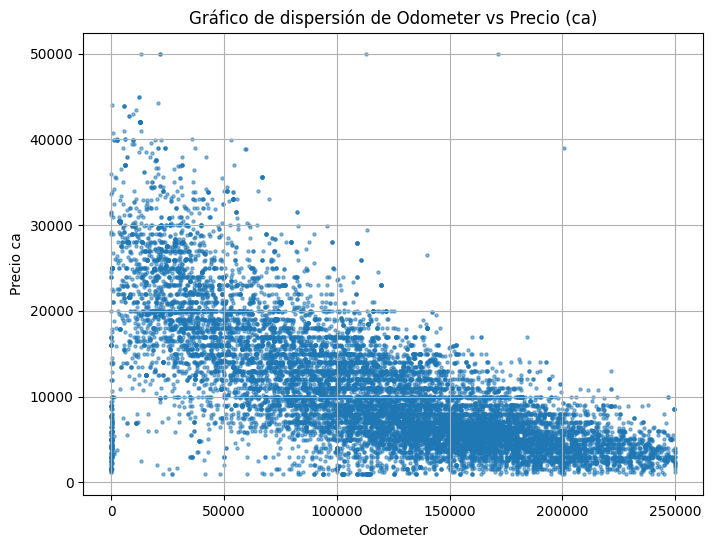

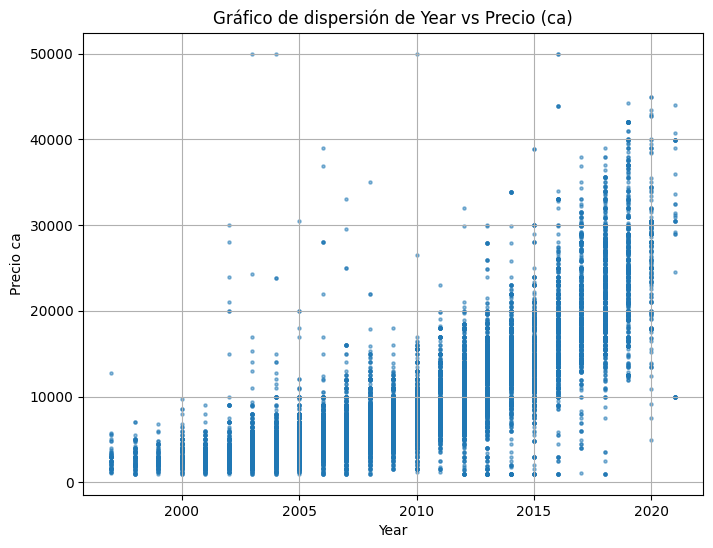

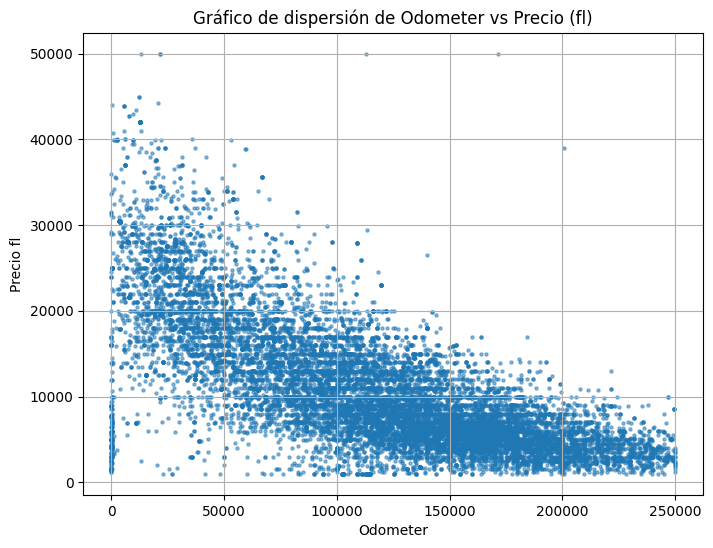

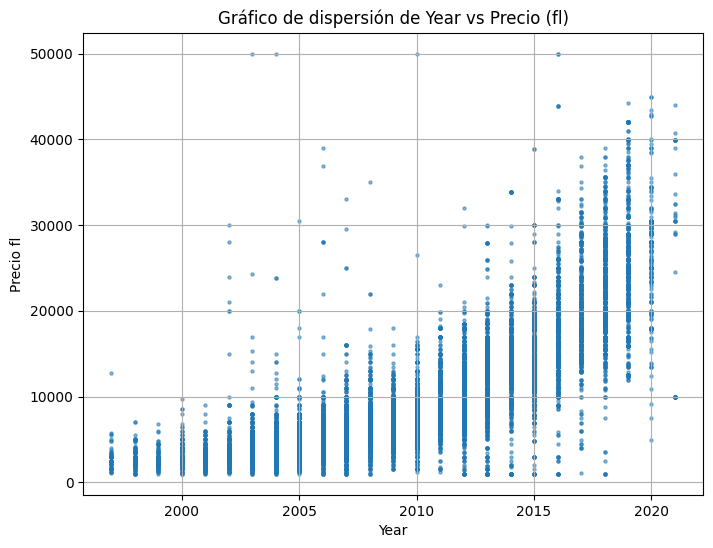

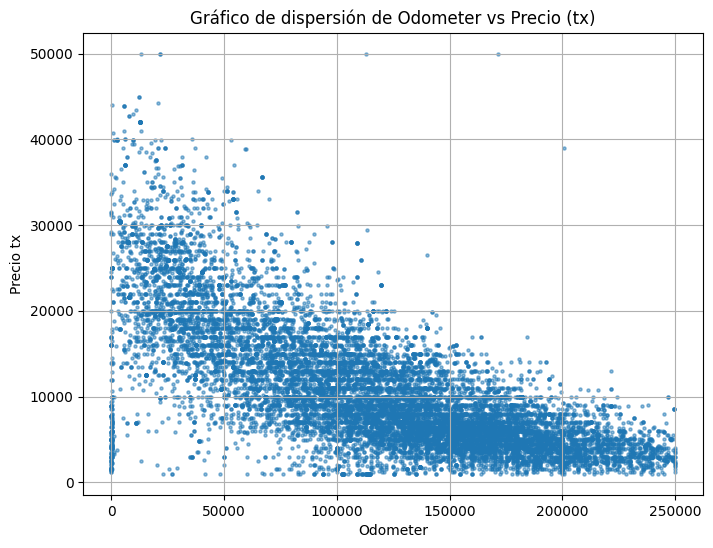

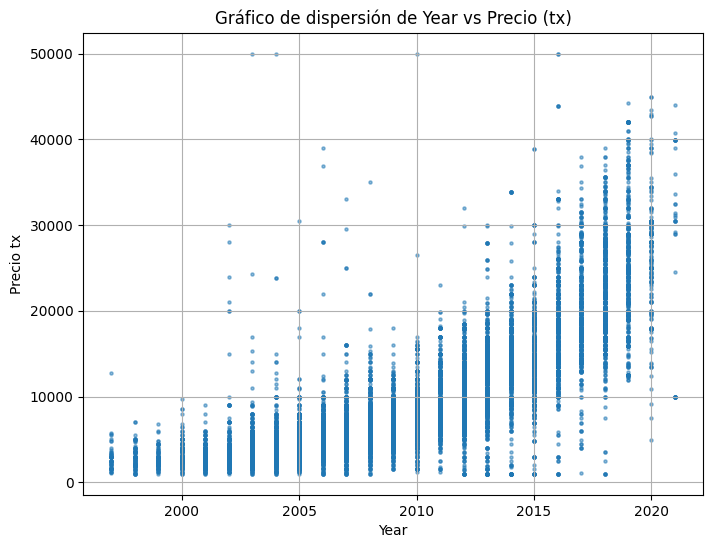

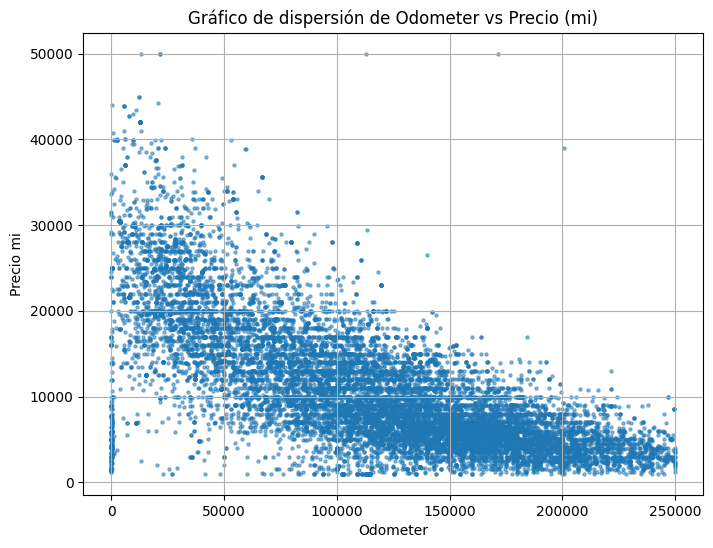

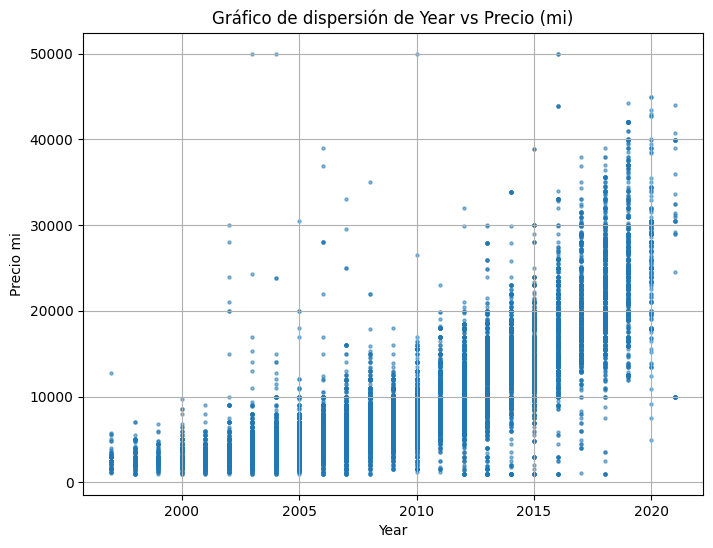

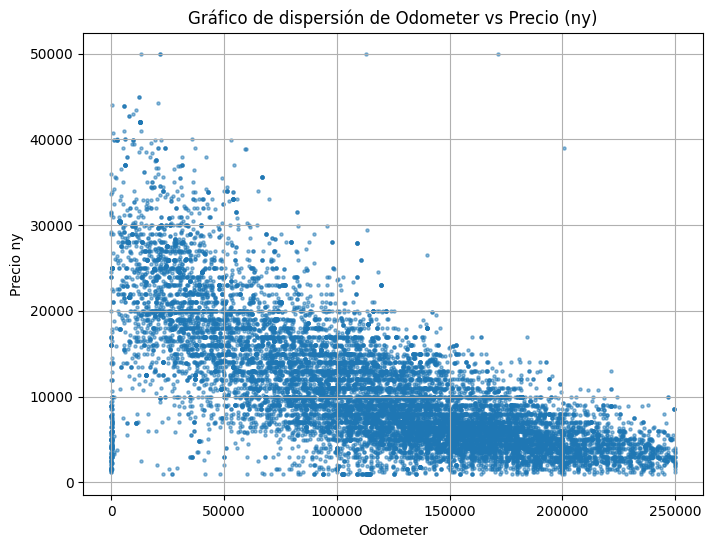

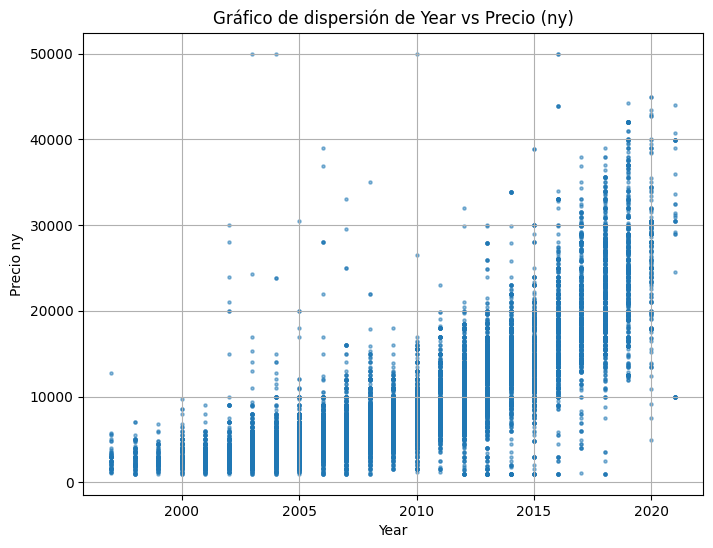

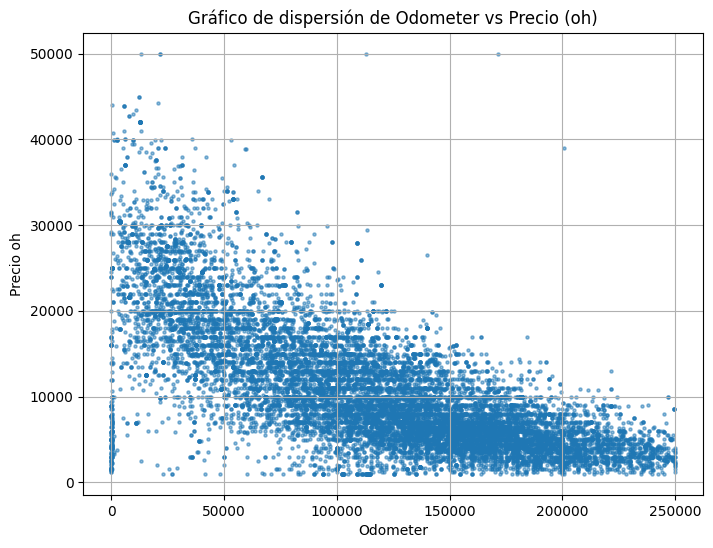

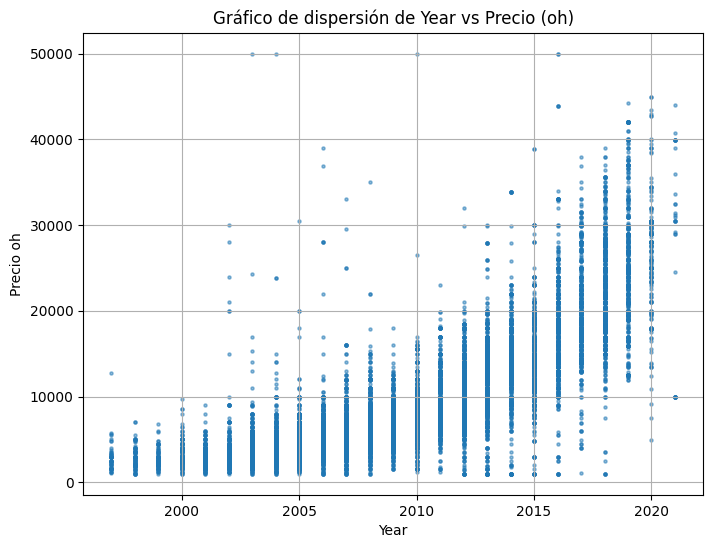

In [22]:
states = ['ca', 'fl', 'tx', 'mi', 'ny','oh']

for s in states:
    df_state = df[df['state'] == s]
    for n in ('odometer', 'year'):
        plt.figure(figsize=(8, 6))
        plt.scatter(df_marca[n], df_marca['price'], alpha=0.5, s=5)  
        plt.title(f'Gráfico de dispersión de {n.capitalize()} vs Precio ({s})')
        plt.xlabel(n.capitalize())
        plt.ylabel('Precio ' + s)
        plt.grid(True)  # Agrega cuadrícula al gráfico
        plt.show()


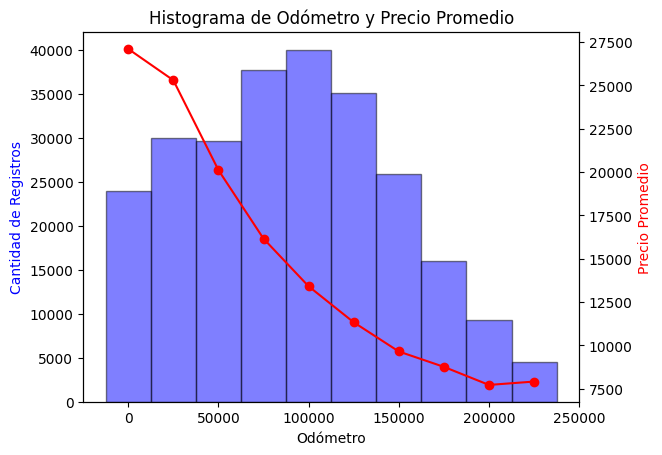

In [23]:
# Calcula el histograma del odómetro con 5 bins
odometer_hist, odometer_bins = np.histogram(df['odometer'], bins=10)

# Calcula el precio promedio en cada bin
price_mean = []
for i in range(len(odometer_bins) - 1):
    bin_start = odometer_bins[i]
    bin_end = odometer_bins[i + 1]
    mask = (df['odometer'] >= bin_start) & (df['odometer'] < bin_end)
    price_mean.append(df[mask]['price'].mean())

# Configura la figura y los ejes
fig, ax1 = plt.subplots()

# Dibuja el histograma en el eje x y la cantidad de registros en el eje y izquierdo
ax1.bar(odometer_bins[:-1], odometer_hist, width=np.diff(odometer_bins), alpha=0.5, color='b', edgecolor='black')
ax1.set_xlabel('Odómetro')
ax1.set_ylabel('Cantidad de Registros', color='b')

# Crea el segundo eje y y dibuja el precio promedio en el eje y derecho
ax2 = ax1.twinx()
ax2.plot(odometer_bins[:-1], price_mean, color='r', marker='o')
ax2.set_ylabel('Precio Promedio', color='r')

# Título y visualización
plt.title('Histograma de Odómetro y Precio Promedio')
plt.show()



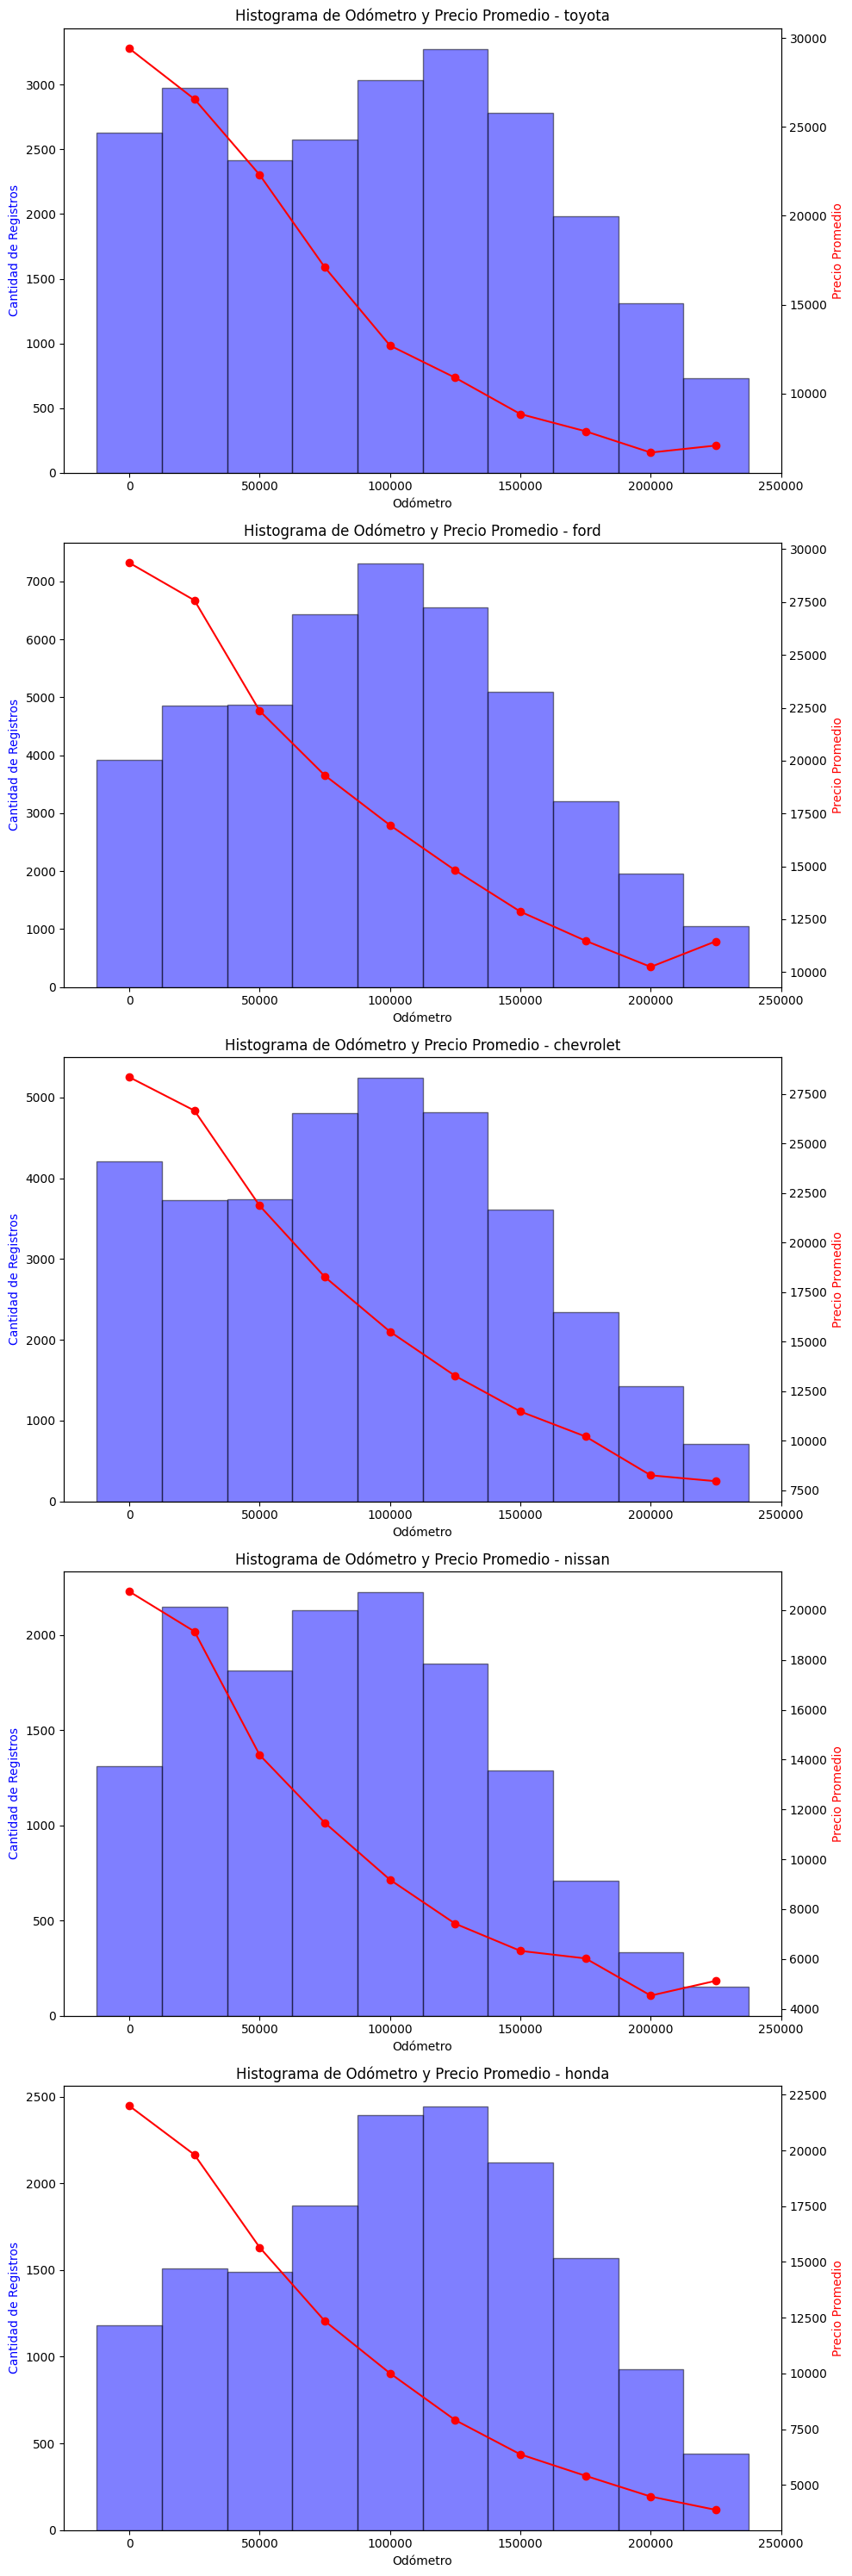

In [24]:
# Lista de fabricantes a filtrar
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']

# Configura la figura y los ejes
fig, axes = plt.subplots(nrows=len(manufacturers), ncols=1, figsize=(10, 6 * len(manufacturers)))

for i, manufacturer in enumerate(manufacturers):
    # Filtra el DataFrame por fabricante
    df_manufacturer = df[df['manufacturer'] == manufacturer]

    # Calcula el histograma del odómetro con 5 bins
    odometer_hist, odometer_bins = np.histogram(df_manufacturer['odometer'], bins=10)

    # Calcula el precio promedio en cada bin
    price_mean = []
    for j in range(len(odometer_bins) - 1):
        bin_start = odometer_bins[j]
        bin_end = odometer_bins[j + 1]
        mask = (df_manufacturer['odometer'] >= bin_start) & (df_manufacturer['odometer'] < bin_end)
        price_mean.append(df_manufacturer[mask]['price'].mean())

    # Dibuja el histograma en el eje x y la cantidad de registros en el eje y izquierdo
    axes[i].bar(odometer_bins[:-1], odometer_hist, width=np.diff(odometer_bins), alpha=0.5, color='b', edgecolor='black')
    axes[i].set_xlabel('Odómetro')
    axes[i].set_ylabel('Cantidad de Registros', color='b')

    # Crea el segundo eje y y dibuja el precio promedio en el eje y derecho
    ax2 = axes[i].twinx()
    ax2.plot(odometer_bins[:-1], price_mean, color='r', marker='o')
    ax2.set_ylabel('Precio Promedio', color='r')

    # Título para cada gráfico basado en el fabricante
    axes[i].set_title(f'Histograma de Odómetro y Precio Promedio - {manufacturer}')

# Ajuste de diseño
plt.tight_layout()
plt.show()


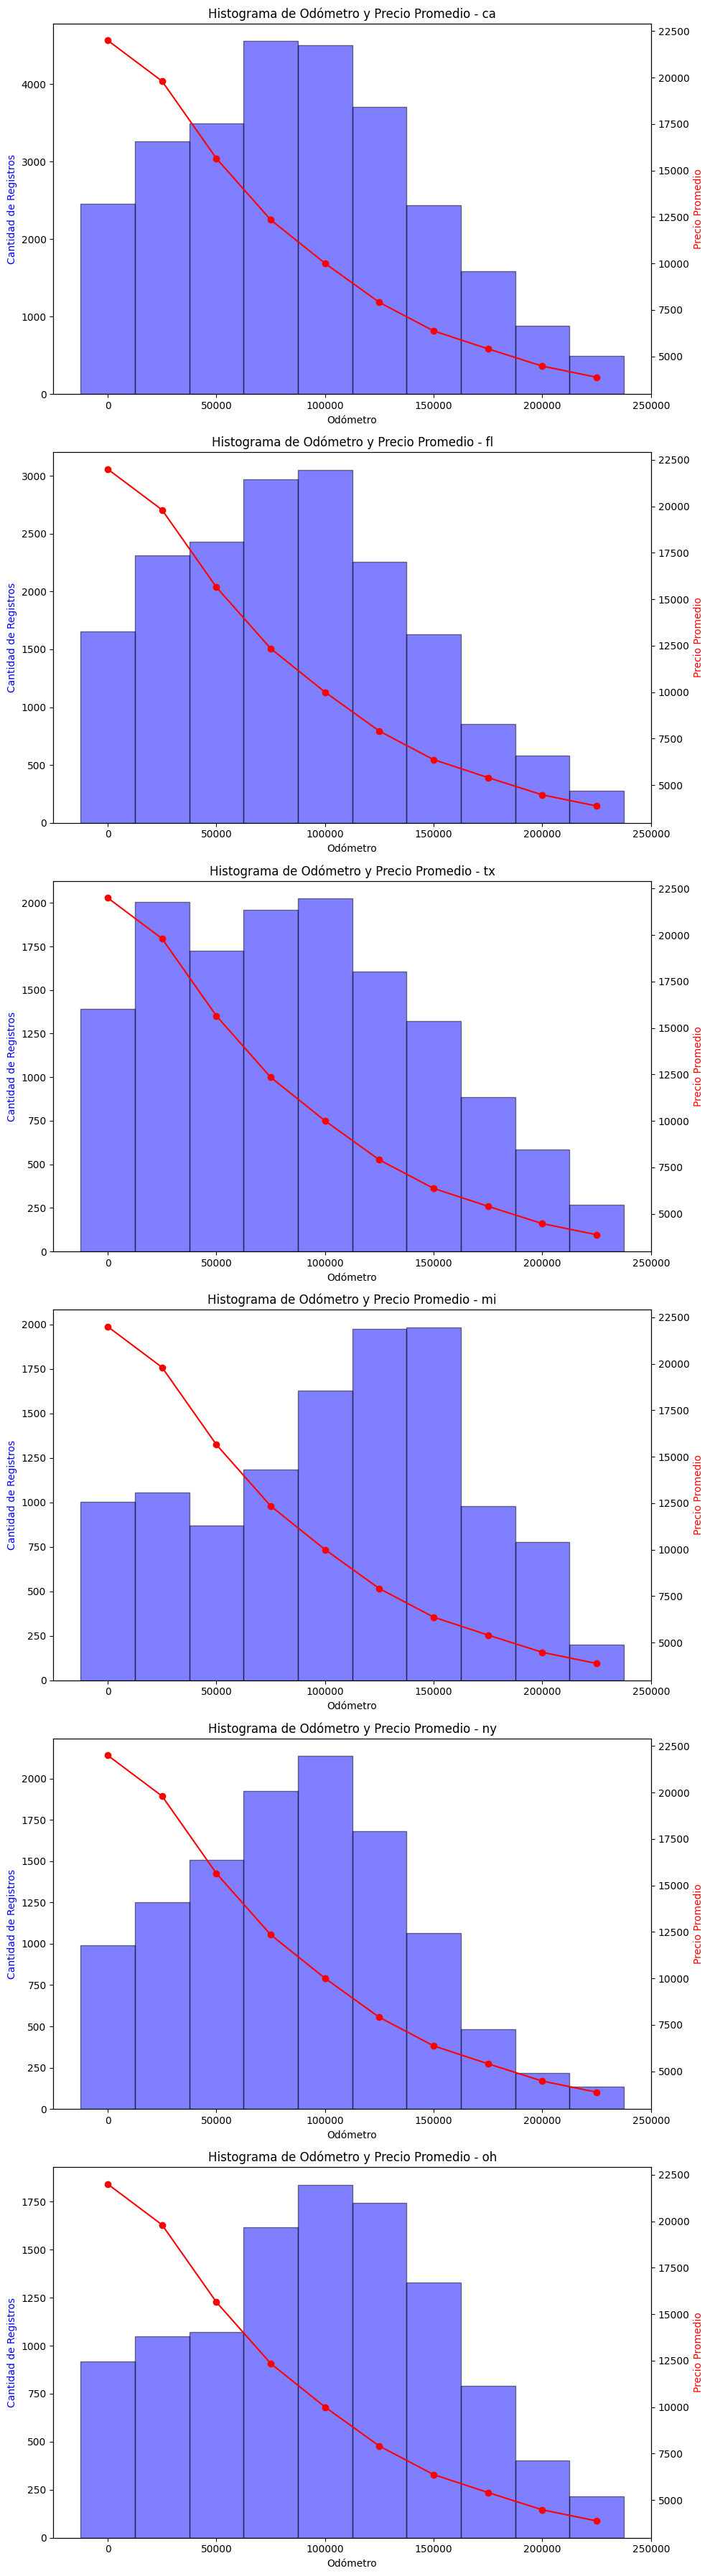

In [25]:
# Lista de fabricantes a filtrar
states = ['ca', 'fl', 'tx', 'mi', 'ny','oh']

# Configura la figura y los ejes
fig, axes = plt.subplots(nrows=len(states), ncols=1, figsize=(10, 6 * len(states)))

for i, s in enumerate(states):
    # Filtra el DataFrame por fabricante
    df_state = df[df['state'] == s]

    # Calcula el histograma del odómetro con 5 bins
    odometer_hist, odometer_bins = np.histogram(df_state['odometer'], bins=10)

    # Calcula el precio promedio en cada bin
    price_mean = []
    for j in range(len(odometer_bins) - 1):
        bin_start = odometer_bins[j]
        bin_end = odometer_bins[j + 1]
        mask = (df_manufacturer['odometer'] >= bin_start) & (df_manufacturer['odometer'] < bin_end)
        price_mean.append(df_manufacturer[mask]['price'].mean())

    # Dibuja el histograma en el eje x y la cantidad de registros en el eje y izquierdo
    axes[i].bar(odometer_bins[:-1], odometer_hist, width=np.diff(odometer_bins), alpha=0.5, color='b', edgecolor='black')
    axes[i].set_xlabel('Odómetro')
    axes[i].set_ylabel('Cantidad de Registros', color='b')

    # Crea el segundo eje y y dibuja el precio promedio en el eje y derecho
    ax2 = axes[i].twinx()
    ax2.plot(odometer_bins[:-1], price_mean, color='r', marker='o')
    ax2.set_ylabel('Precio Promedio', color='r')

    # Título para cada gráfico basado en el fabricante
    axes[i].set_title(f'Histograma de Odómetro y Precio Promedio - {s}')

# Ajuste de diseño
plt.tight_layout()
plt.show()

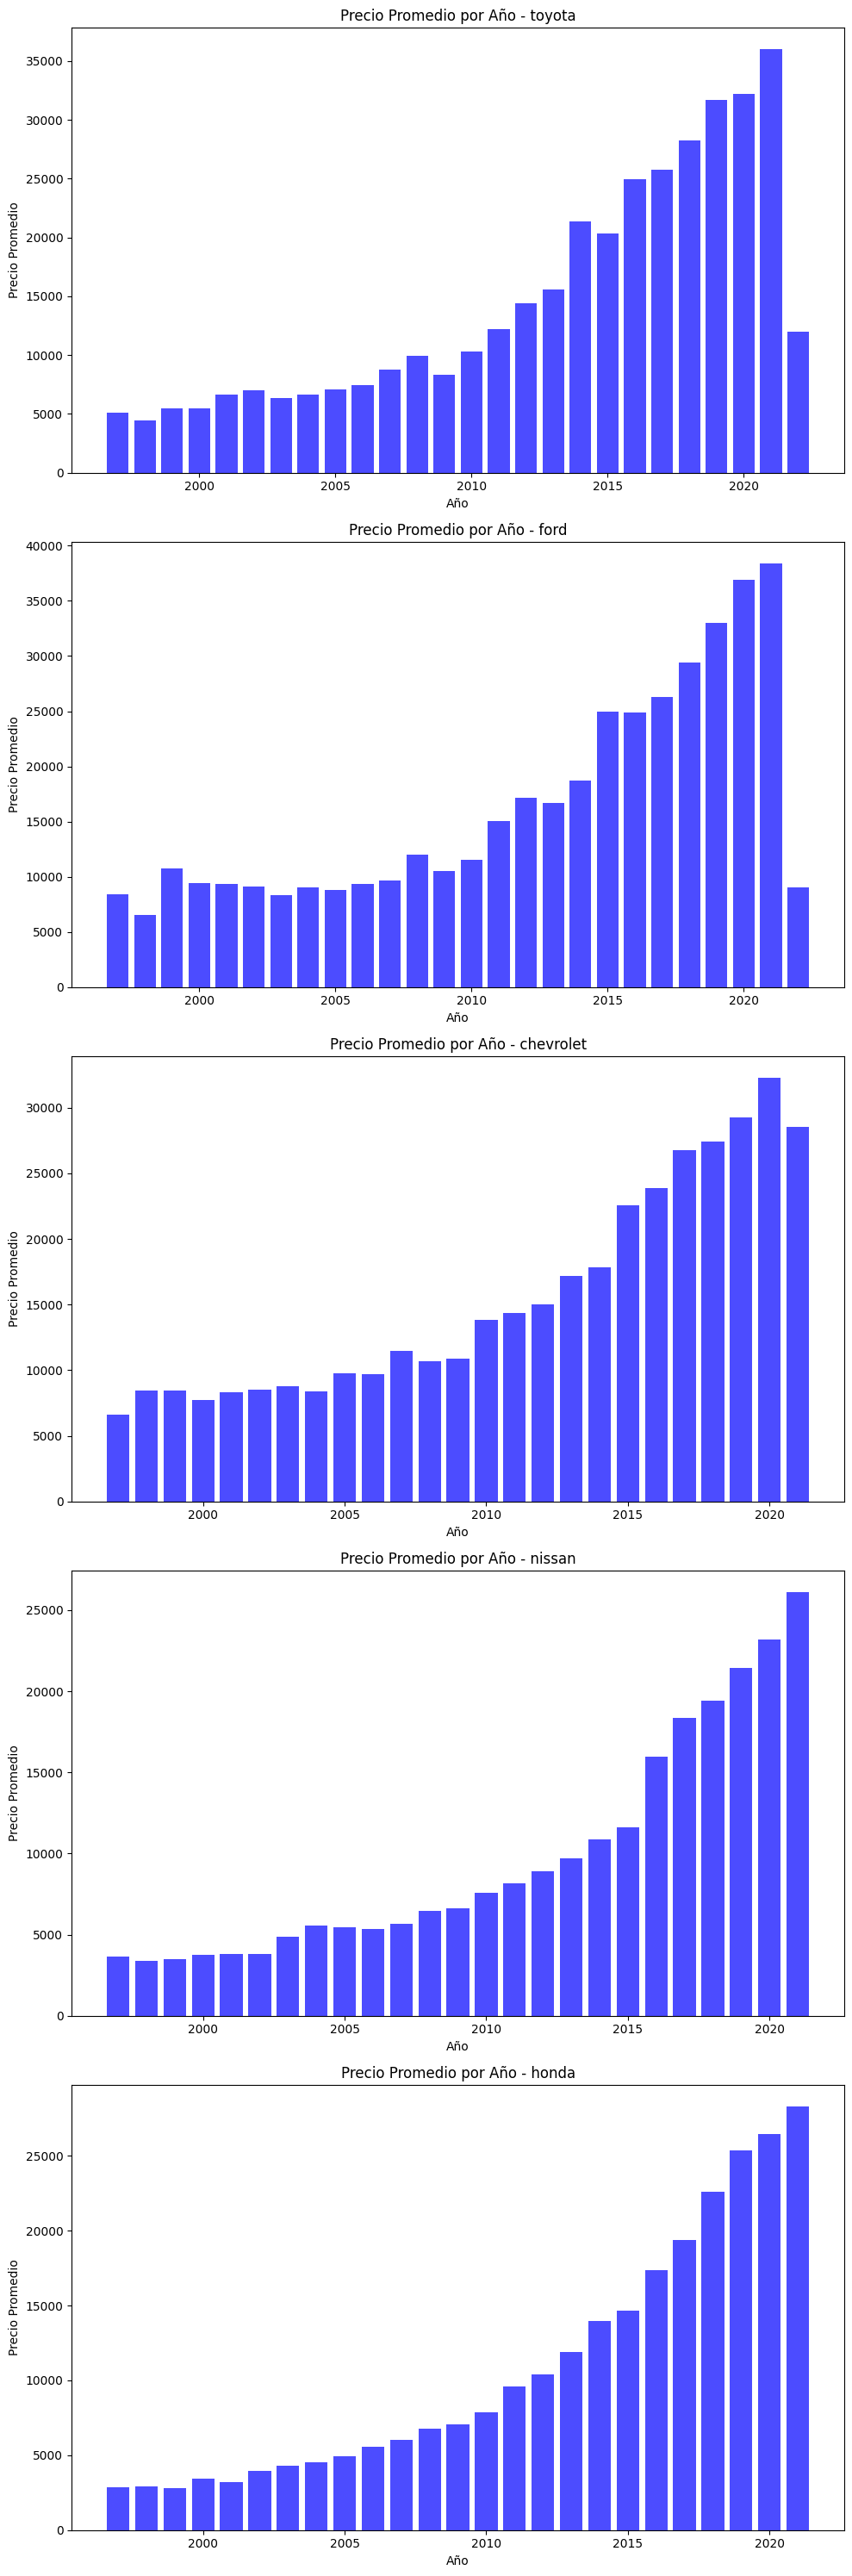

In [26]:
# Lista de fabricantes a filtrar
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']

# Configura la figura y los ejes
fig, axes = plt.subplots(nrows=len(manufacturers), ncols=1, figsize=(10, 6 * len(manufacturers)))

for i, manufacturer in enumerate(manufacturers):
    # Filtra el DataFrame por fabricante
    df_manufacturer = df[df['manufacturer'] == manufacturer]

    # Calcula el precio promedio por año
    mean_price_by_year = df_manufacturer.groupby('year')['price'].mean()

    # Dibuja el gráfico de barras
    axes[i].bar(mean_price_by_year.index, mean_price_by_year.values, color='b', alpha=0.7)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel('Precio Promedio')
    axes[i].set_title(f'Precio Promedio por Año - {manufacturer}')

# Ajuste de diseño
plt.tight_layout()
plt.show()



In [27]:
total_autos_por_estado = df['state'].value_counts()
print(total_autos_por_estado)

state
ca    27362
fl    18019
tx    13776
mi    11657
ny    11384
oh    10977
or     8304
pa     8068
wi     7436
nc     7371
tn     6852
co     6753
nj     6596
wa     6509
ia     6362
il     6216
va     5787
id     5505
mn     5359
ma     5146
az     4636
mt     4127
ks     3989
ok     3715
ga     3424
in     3340
ct     3123
sc     2939
al     2939
ak     2789
ky     2685
mo     2587
md     2567
ar     2214
nh     2066
nm     2027
nv     1964
me     1925
vt     1899
hi     1813
dc     1774
la     1709
ri     1448
sd      879
ne      731
ms      662
ut      639
de      587
wv      521
nd      315
wy      302
Name: count, dtype: int64


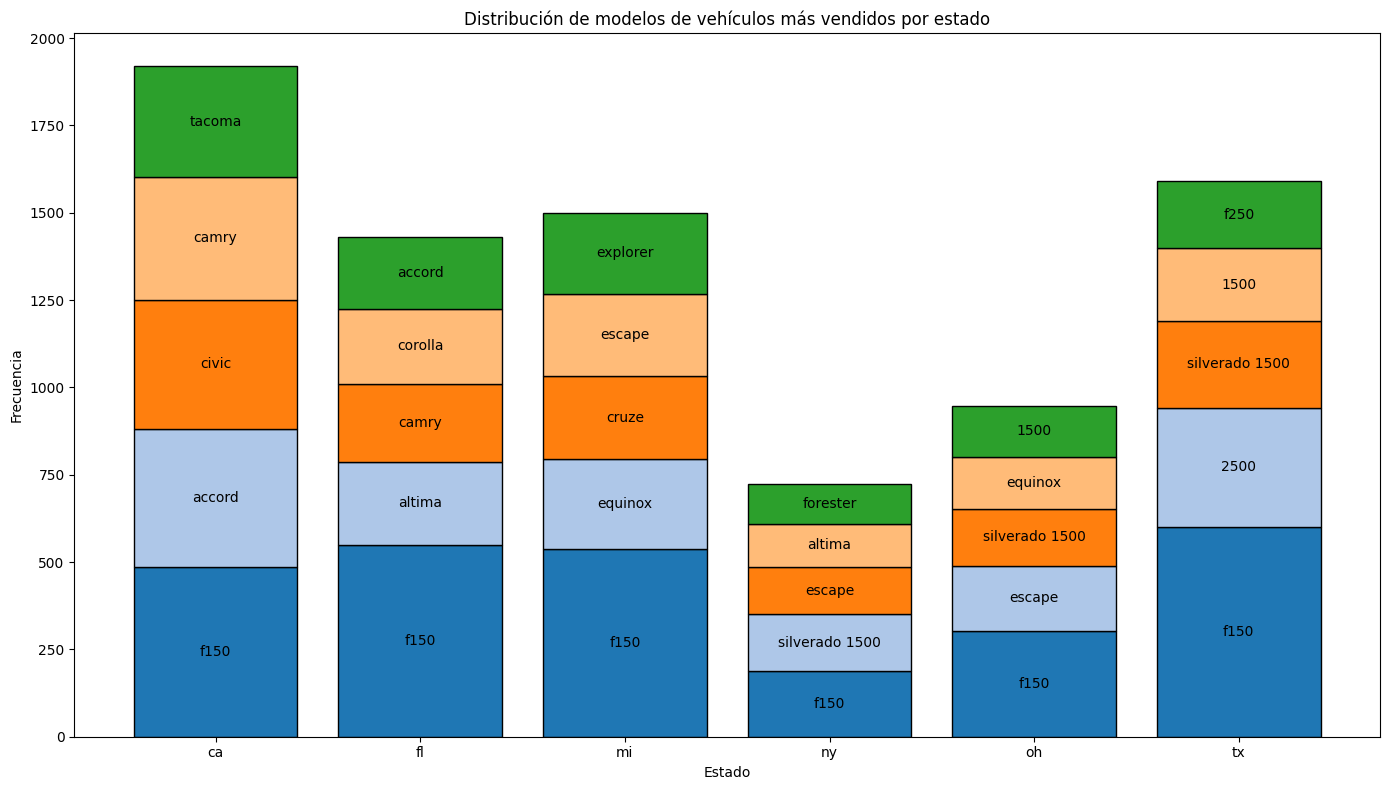

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de estados especificados
states = ['ca', 'fl', 'tx', 'mi', 'ny', 'oh']

# Filtramos el DataFrame para incluir solo los estados especificados
df_filtered = df[df['state'].isin(states)]

# Calculamos las frecuencias y porcentajes por estado y modelo
df_freq = df_filtered.groupby(['state', 'model']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los modelos por porcentaje para cada estado
sorted_models = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Obtenemos una lista de todos los modelos únicos
unique_models = df['model'].unique()

# Definimos una paleta de colores
color_palette = plt.cm.tab20.colors  # Puedes cambiar 'tab20' a otra paleta si deseas más colores

# Creamos un diccionario para almacenar los colores asignados a cada modelo
model_colors = {}  # Inicializamos el diccionario vacío

# Dibujamos las barras apiladas
for state in df_freq.index:
    bottom = 0
    for i, model in enumerate(sorted_models[state][:5]):  # Iteramos con índice y modelo
        height = df_freq.loc[state, model]

        # Asignamos un color único al modelo dentro del estado actual
        if state not in model_colors:
            model_colors[state] = {}  # Inicializamos diccionario para colores por estado
        if model not in model_colors[state]:
            model_colors[state][model] = color_palette[i % len(unique_models)]  # Asignamos color por índice
        color = model_colors[state][model]

        ax.bar(state, height, bottom=bottom, width=0.8, color=color, edgecolor='black')
        ax.text(state, bottom + height/2, model, ha='center', va='center', fontsize=10)
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Estado')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de modelos de vehículos más vendidos por estado')

plt.xticks(rotation=0)
plt.tight_layout()

# Mostramos el gráfico
plt.show()


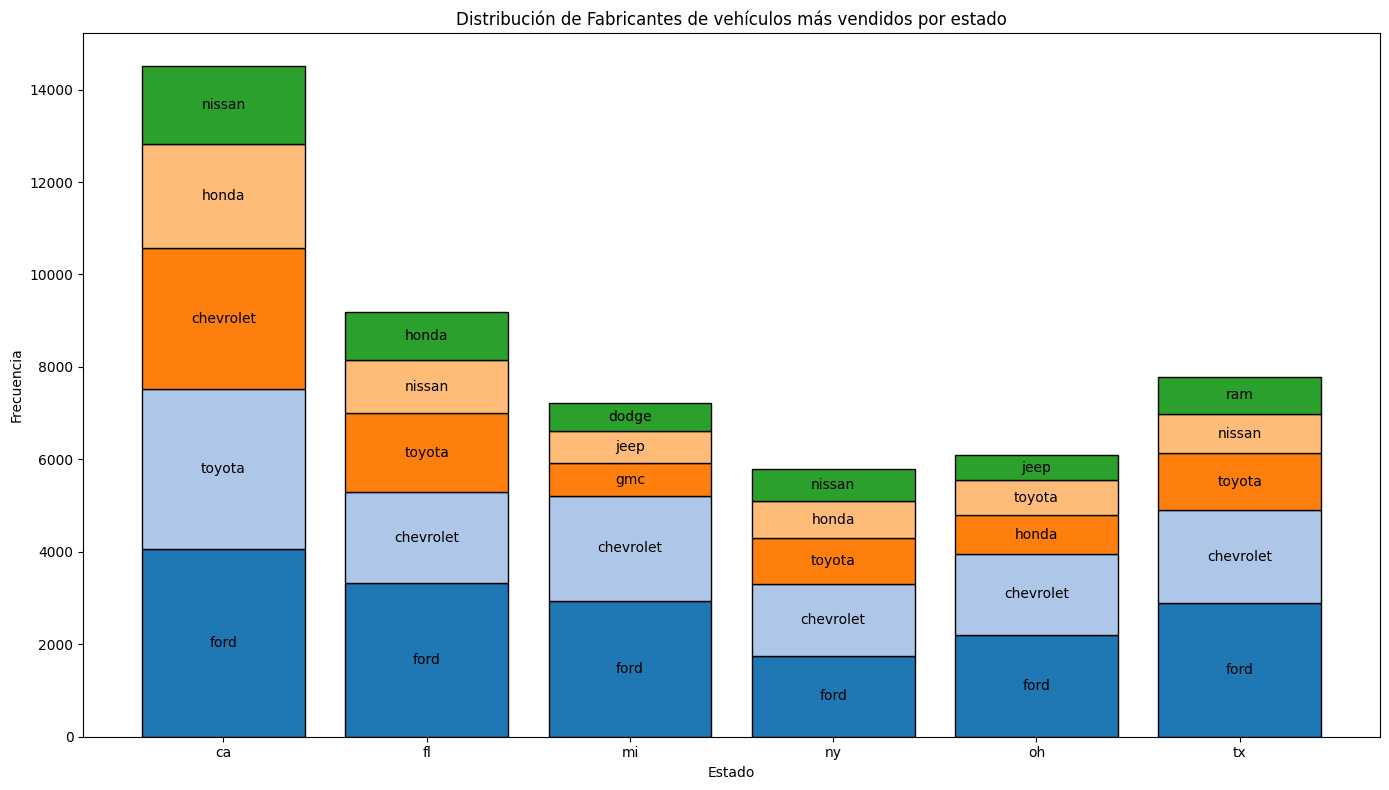

In [33]:
# Lista de estados especificados
states = ['ca', 'fl', 'tx', 'mi', 'ny', 'oh']

# Filtramos el DataFrame para incluir solo los estados especificados
df_filtered = df[df['state'].isin(states)]

# Calculamos las frecuencias y porcentajes por estado y modelo
df_freq = df_filtered.groupby(['state', 'manufacturer']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los modelos por porcentaje para cada estado
sorted_models = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Obtenemos una lista de todos los modelos únicos
unique_models = df['manufacturer'].unique()

# Definimos una paleta de colores
color_palette = plt.cm.tab20.colors  # Puedes cambiar 'tab20' a otra paleta si deseas más colores

# Creamos un diccionario para almacenar los colores asignados a cada modelo
model_colors = {}  # Inicializamos el diccionario vacío

# Dibujamos las barras apiladas
for state in df_freq.index:
    bottom = 0
    for i, model in enumerate(sorted_models[state][:5]):  # Iteramos con índice y modelo
        height = df_freq.loc[state, model]

        # Asignamos un color único al modelo dentro del estado actual
        if state not in model_colors:
            model_colors[state] = {}  # Inicializamos diccionario para colores por estado
        if model not in model_colors[state]:
            model_colors[state][model] = color_palette[i % len(unique_models)]  # Asignamos color por índice
        color = model_colors[state][model]

        ax.bar(state, height, bottom=bottom, width=0.8, color=color, edgecolor='black')
        ax.text(state, bottom + height/2, model, ha='center', va='center', fontsize=10)
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Estado')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Fabricantes de vehículos más vendidos por estado')

plt.xticks(rotation=0)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

In [ ]:
precio_promedio = df['price'].mean()
print (precio_promedio)

16044.196803482488
